# Product Offer Predict With CRISP-DM Methodology

# 1. Bussiness Understanding

##### A. Bussiness Objectibe       : The company wants to offer vending machine products to customers.
##### B. Model Objective              : Create a classification engine to determine whether the customer is suitable if offered a                                                                                                         vending machine, matches are marked with "flag 1", if not matched, marked "flag 0".
##### C. Model Success Criteria : Recall minimum 0,7 and FPR maximum 0,5.

# 2. Data Understanding

##### A. Data Description

In [1]:
# Load Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option("display.max_column", None)
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
df_train = pd.read_csv('trainset.csv')
df_test = pd.read_csv('testset.csv')
df_backtesting = pd.read_csv('backtestset.csv')

In [3]:
df_train.shape

(11059, 80)

In [4]:
df_test.shape

(2765, 80)

In [5]:
df_backtesting.shape

(3456, 79)

In [6]:
df_train.head()

,kode pelanggan,umur,kota,gender,education,keluarga,Pekerjaan,Penanggung,Usaha,punya_produk1,punya_produk2,punya_produk3,punya_produk4,punya_produk5,punya_produk6,jualan,omset,penghasilan,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,average_sisauang_mingguan_6BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_akhir_5BT,sisauang_akhir_6BT,sisauang_tertahan_1BT,sisauang_tertahan_2BT,sisauang_tertahan_3BT,sisauang_tertahan_4BT,sisauang_tertahan_5BT,sisauang_tertahan_6BT,sisauang_tersedia_1BT,sisauang_tersedia_2BT,sisauang_tersedia_3BT,sisauang_tersedia_4BT,sisauang_tersedia_5BT,sisauang_tersedia_6BT,sisa_hutang_1BT,sisa_hutang_2BT,sisa_hutang_3BT,sisa_hutang_4BT,sisa_hutang_5BT,sisa_hutang_6BT,jumlah_pembayaran_hutang_1BT,jumlah_pembayaran_hutang_2BT,jumlah_pembayaran_hutang_3BT,jumlah_pembayaran_hutang_4BT,jumlah_pembayaran_hutang_5BT,jumlah_pembayaran_hutang_6BT,jumlah_pengeluaran_1BT,jumlah_pengeluaran_2BT,jumlah_pengeluaran_3BT,jumlah_pengeluaran_4BT,jumlah_pengeluaran_5BT,jumlah_pengeluaran_6BT,jumlah_pemasukan_1BT,jumlah_pemasukan_2BT,jumlah_pemasukan_3BT,jumlah_pemasukan_4BT,jumlah_pemasukan_5BT,jumlah_pemasukan_6BT,frekuensi_pengeluaran_1BT,frekuensi_pengeluaran_2BT,frekuensi_pengeluaran_3BT,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,tgl data,flag
0,TLP5787,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
1,V798888,32.0,G,F,NaN,K,Mahasiswa Diploma / S1 / S2,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
2,INX8444,28.0,L,M,NaN,K,Usaha Mandiri,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,15.114314,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
3,HP08456,58.0,N,M,NaN,K,Karyawan,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,04/08/23 14.17,0.0
4,HBJ1138,34.0,Q,F,NaN,K,Usaha Mandiri,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,6344.258121,6206.943591,6171.870696,6157.494597,6245.942203,6310.354988,6184.011337,6210.569267,6367.148219,6108.901101,6370.148008,6131.481599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.735658,1937.924424,2146.378375,2351.163245,2552.343715,2749.983057,0.0,0.0,0.0,0.0,0.0,0.0,164.241212,0.0,0.0,5.476237,0.0,0.0,137.683282,0.0,0.0,0.0,0.0,0.0,24.0,22.0,31.0,36.0,37.0,26.0,38.0,19.0,24.0,46.0,42.0,37.0,04/08/23 14.17,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   kode pelanggan                 11059 non-null  object 
 1   umur                           10898 non-null  float64
 2   kota                           10902 non-null  object 
 3   gender                         9063 non-null   object 
 4   education                      0 non-null      float64
 5   keluarga                       9009 non-null   object 
 6   Pekerjaan                      8448 non-null   object 
 7   Penanggung                     916 non-null    object 
 8   Usaha                          1557 non-null   object 
 9   punya_produk1                  10902 non-null  float64
 10  punya_produk2                  10902 non-null  float64
 11  punya_produk3                  10902 non-null  float64
 12  punya_produk4                  10902 non-null 

In [8]:
#Basic Statistic
df_train.describe()

,umur,education,punya_produk1,punya_produk2,punya_produk3,punya_produk4,punya_produk5,punya_produk6,omset,penghasilan,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,average_sisauang_mingguan_6BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_akhir_5BT,sisauang_akhir_6BT,sisauang_tertahan_1BT,sisauang_tertahan_2BT,sisauang_tertahan_3BT,sisauang_tertahan_4BT,sisauang_tertahan_5BT,sisauang_tertahan_6BT,sisauang_tersedia_1BT,sisauang_tersedia_2BT,sisauang_tersedia_3BT,sisauang_tersedia_4BT,sisauang_tersedia_5BT,sisauang_tersedia_6BT,sisa_hutang_1BT,sisa_hutang_2BT,sisa_hutang_3BT,sisa_hutang_4BT,sisa_hutang_5BT,sisa_hutang_6BT,jumlah_pembayaran_hutang_1BT,jumlah_pembayaran_hutang_2BT,jumlah_pembayaran_hutang_3BT,jumlah_pembayaran_hutang_4BT,jumlah_pembayaran_hutang_5BT,jumlah_pembayaran_hutang_6BT,jumlah_pengeluaran_1BT,jumlah_pengeluaran_2BT,jumlah_pengeluaran_3BT,jumlah_pengeluaran_4BT,jumlah_pengeluaran_5BT,jumlah_pengeluaran_6BT,jumlah_pemasukan_1BT,jumlah_pemasukan_2BT,jumlah_pemasukan_3BT,jumlah_pemasukan_4BT,jumlah_pemasukan_5BT,jumlah_pemasukan_6BT,frekuensi_pengeluaran_1BT,frekuensi_pengeluaran_2BT,frekuensi_pengeluaran_3BT,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,flag
count,10898.000000,0.0,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,0.0,0.0,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,1.105900e+04,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000,11059.000000
mean,34.694164,NaN,0.321317,0.570813,0.876720,0.263254,0.087507,0.256375,NaN,NaN,2.818236e+04,2.745836e+04,3.064320e+04,2.181281e+04,2.277387e+04,1.941452e+04,3.109745e+04,2.539160e+04,2.944786e+04,2.511442e+04,1.721708e+04,2.468287e+04,7.096736e+03,6.991963e+03,1.340020e+04,1.323296e+04,5.689775e+02,4.951926e+02,1.965831e+04,1.663196e+04,2.081804e+04,1.942917e+04,1.165922e+04,1.911033e+04,1.475220e+04,1.335393e+04,1.234998e+04,1.116002e+04,1.055859e+04,1.023699e+04,7.514989e+03,6.845917e+03,6.403365e+03,5.977058e+03,5.803560e+03,5.631211e+03,4.089835e+04,3.817698e+04,4.065571e+04,4.353534e+04,3.789753e+04,4.844001e+04,4.328561e+04,3.379802e+04,4.242857e+04,4.853874e+04,3.065075e+04,4.384316e+04,113.698436,107.929288,103.711999,101.491817,96.429967,89.672846,57.752600,55.387648,51.984357,51.748711,49.291166,46.466679,0.108057
std,16.658376,NaN,0.467004,0.494983,0.328774,0.440420,0.282589,0.436651,NaN,NaN,1.065601e+06,9.941917e+05,1.362533e+06,8.745539e+05,1.233153e+06,9.335926e+05,1.319782e+06,7.737964e+05,1.119813e+06,1.154070e+06,5.886775e+05,1.368072e+06,6.688158e+05,6.688040e+05,9.455816e+05,9.455465e+05,1.813675e+04,1.723346e+04,9.850072e+05,6.918745e+05,1.046608e+06,1.087938e+06,5.128788e+05,1.300887e+06,1.008089e+05,9.724967e+04,9.618241e+04,8.943095e+04,8.957986e+04,8.862457e+04,5.583347e+04,5.435763e+04,5.401153e+04,5.337733e+04,5.334150e+04,5.317198e+04,8.229725e+05,7.682760e+05,1.034351e+06,1.457950e+06,1.288939e+06,2.468817e+06,9.797977e+05,5.012901e+05,1.041813e+06,1.793687e+06,5.952026e+05,1.913206e+06,468.953265,454.244705,445.735568,447.4728

###### B. EDA (Exploratory Data Analysis)

In [9]:
df_train_num_eda = df_train.select_dtypes(include = 'number')
df_train_obj_eda = df_train.select_dtypes(include = 'object')

In [10]:
df_train_obj_eda.head()

,kode pelanggan,kota,gender,keluarga,Pekerjaan,Penanggung,Usaha,jualan,tgl data
0,TLP5787,C,NaN,NaN,NaN,NaN,NaN,NaN,04/08/23 14.17
1,V798888,G,F,K,Mahasiswa Diploma / S1 / S2,NaN,NaN,NaN,04/08/23 14.17
2,INX8444,L,M,K,Usaha Mandiri,NaN,NaN,NaN,04/08/23 14.17
3,HP08456,N,M,K,Karyawan,NaN,NaN,NaN,04/08/23 14.17
4,HBJ1138,Q,F,K,Usaha Mandiri,NaN,NaN,NaN,04/08/23 14.17


In [11]:
df_train_num_eda.head()

,umur,education,punya_produk1,punya_produk2,punya_produk3,punya_produk4,punya_produk5,punya_produk6,omset,penghasilan,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,average_sisauang_mingguan_6BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_akhir_5BT,sisauang_akhir_6BT,sisauang_tertahan_1BT,sisauang_tertahan_2BT,sisauang_tertahan_3BT,sisauang_tertahan_4BT,sisauang_tertahan_5BT,sisauang_tertahan_6BT,sisauang_tersedia_1BT,sisauang_tersedia_2BT,sisauang_tersedia_3BT,sisauang_tersedia_4BT,sisauang_tersedia_5BT,sisauang_tersedia_6BT,sisa_hutang_1BT,sisa_hutang_2BT,sisa_hutang_3BT,sisa_hutang_4BT,sisa_hutang_5BT,sisa_hutang_6BT,jumlah_pembayaran_hutang_1BT,jumlah_pembayaran_hutang_2BT,jumlah_pembayaran_hutang_3BT,jumlah_pembayaran_hutang_4BT,jumlah_pembayaran_hutang_5BT,jumlah_pembayaran_hutang_6BT,jumlah_pengeluaran_1BT,jumlah_pengeluaran_2BT,jumlah_pengeluaran_3BT,jumlah_pengeluaran_4BT,jumlah_pengeluaran_5BT,jumlah_pengeluaran_6BT,jumlah_pemasukan_1BT,jumlah_pemasukan_2BT,jumlah_pemasukan_3BT,jumlah_pemasukan_4BT,jumlah_pemasukan_5BT,jumlah_pemasukan_6BT,frekuensi_pengeluaran_1BT,frekuensi_pengeluaran_2BT,frekuensi_pengeluaran_3BT,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,flag
0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,15.114314,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
4,34.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,6344.258121,6206.943591,6171.870696,6157.494597,6245.942203,6310.354988,6184.011337,6210.569267,6367.148219,6108.901101,6370.148008,6131.481599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.735658,1937.924424,2146.378375,2351.163245,2552.343715,2749.983057,0.0,0.0,0.0,0.0,0.0,0.0,164.241212,0.0,0.0,5.476237,0.0,0.0,137.683282,0.0,0.0,0.0,0.0,0.0,24.0,22.0,31.0,36.0,37.0,26.0,38.0,19.0,24.0,46.0,42.0,37.0,0.0


In [12]:
#I will drop column "kode pelanggan" because to much cardinality and drop "tgl data" because it only consists of one value
df_train_obj_eda = df_train_obj_eda.drop(['kode pelanggan', 'tgl data'], axis=1)

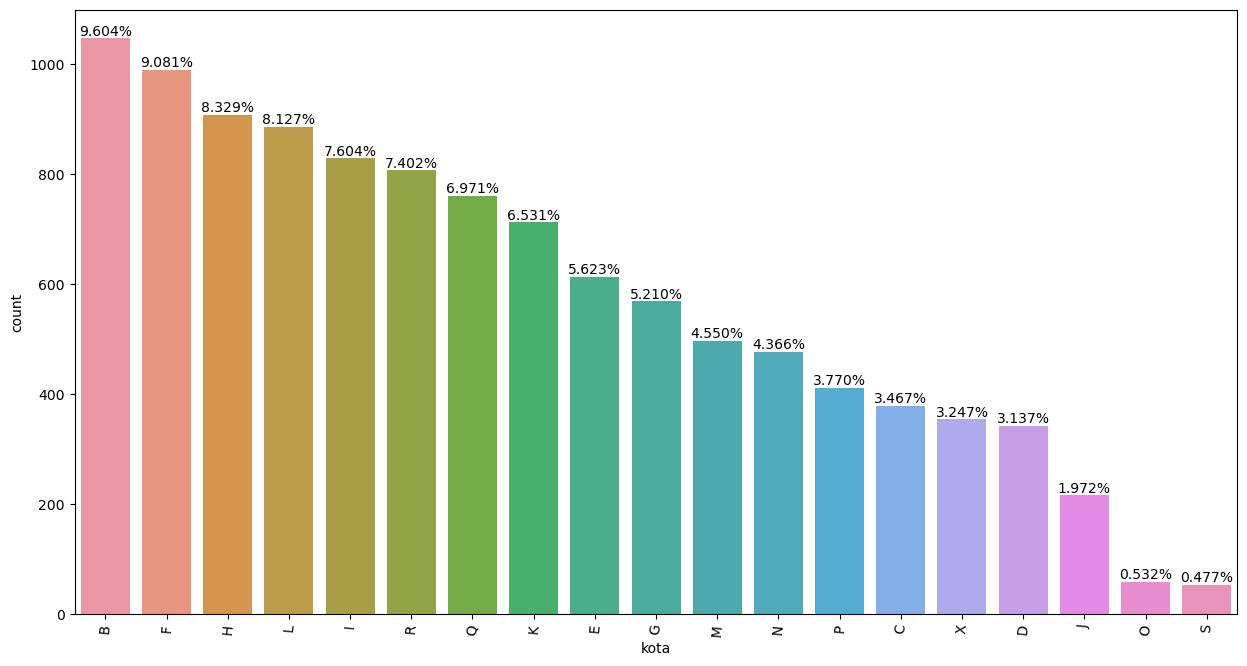

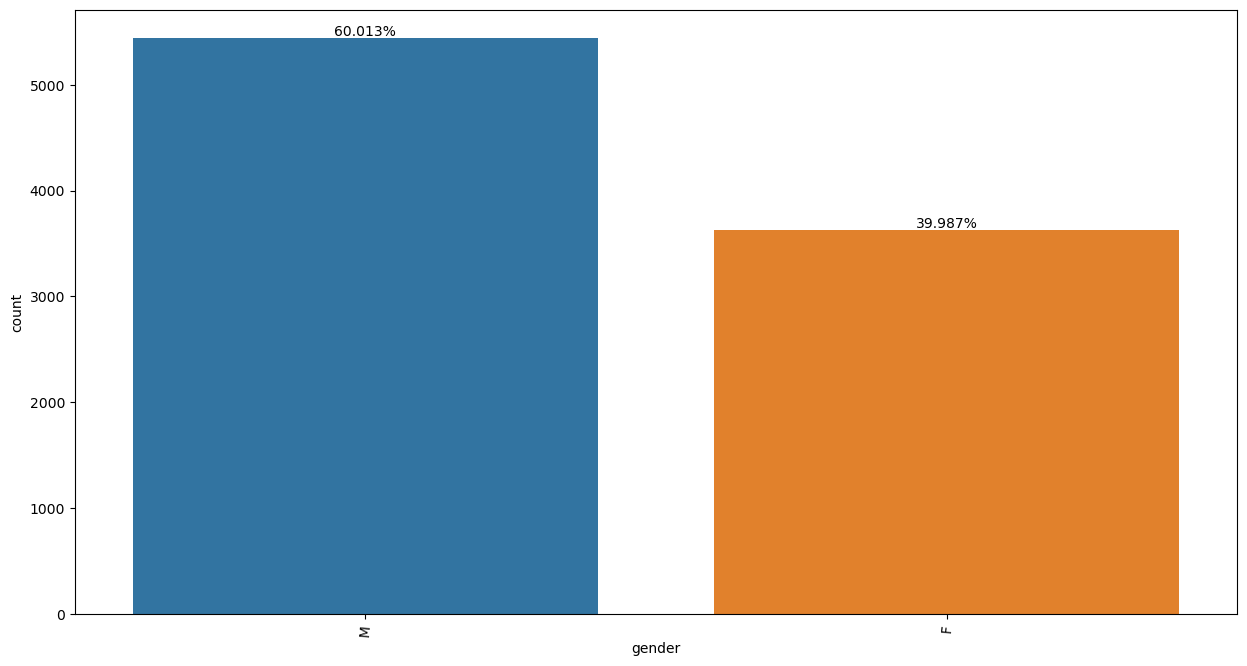

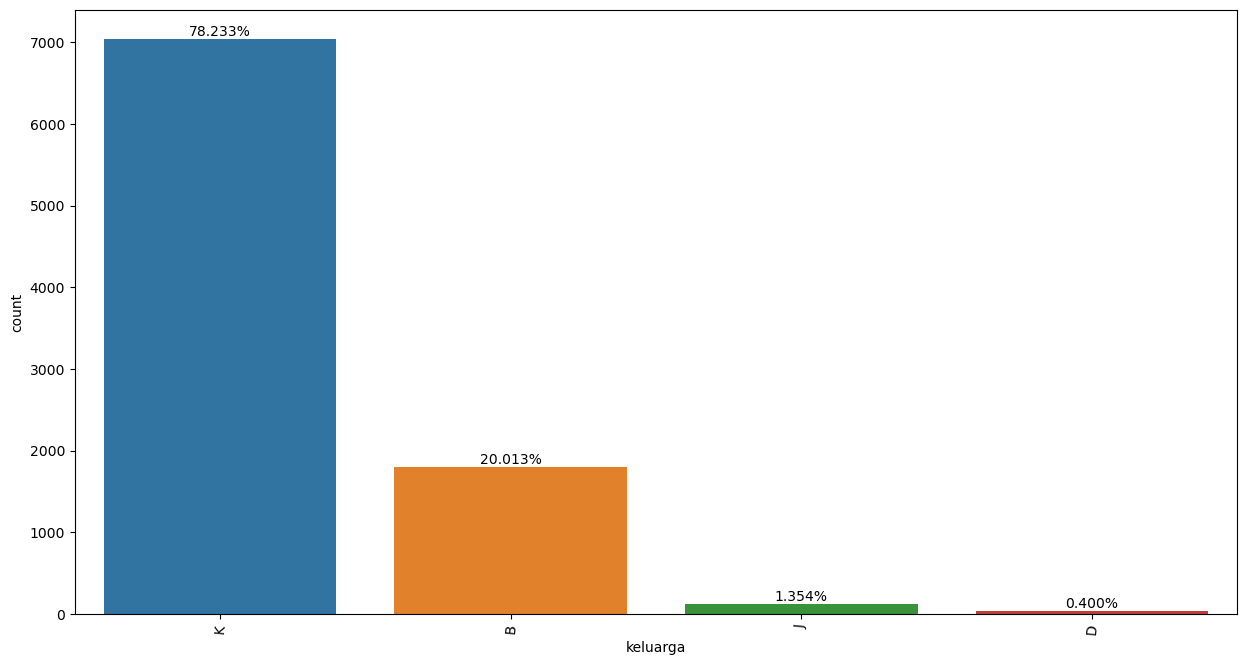

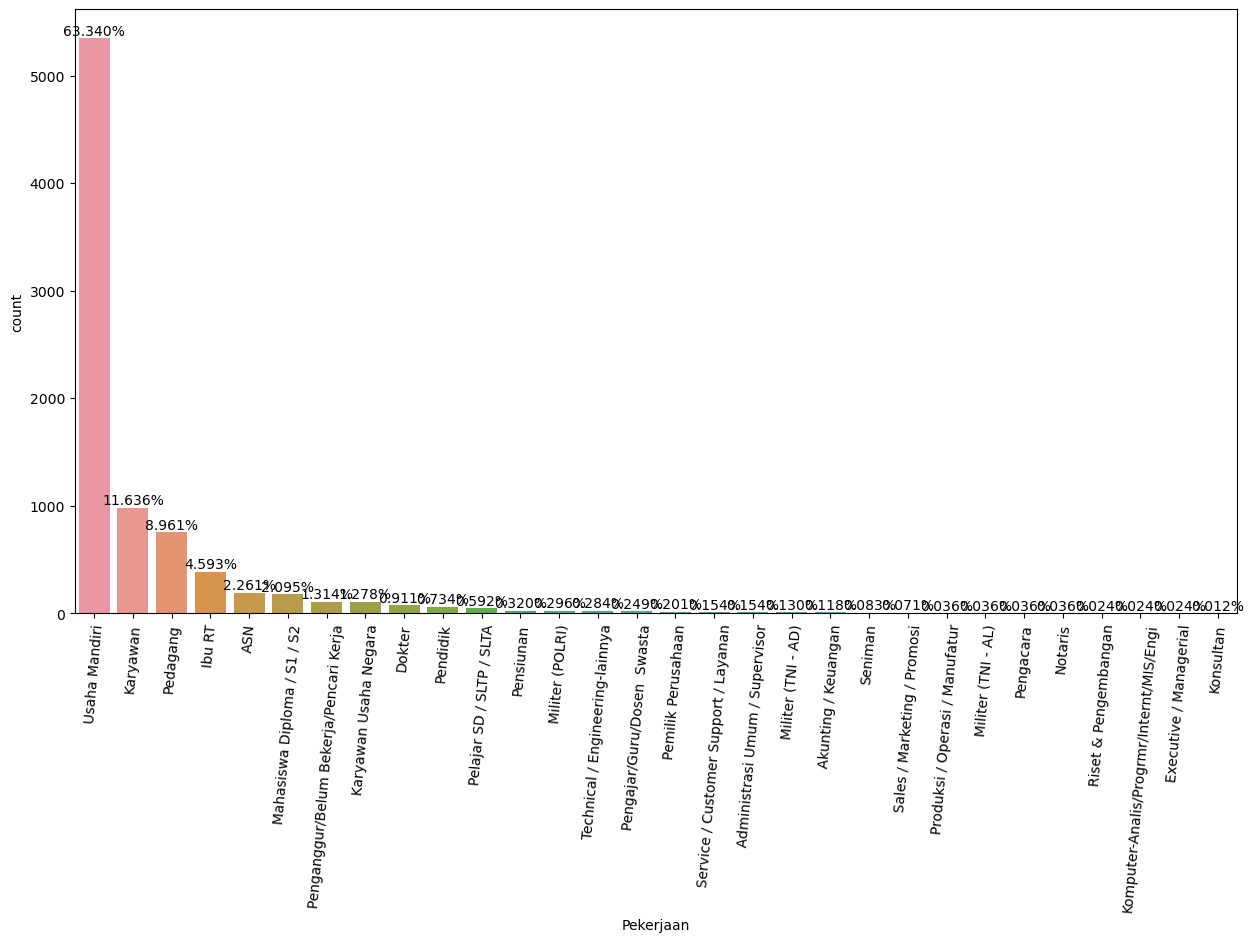

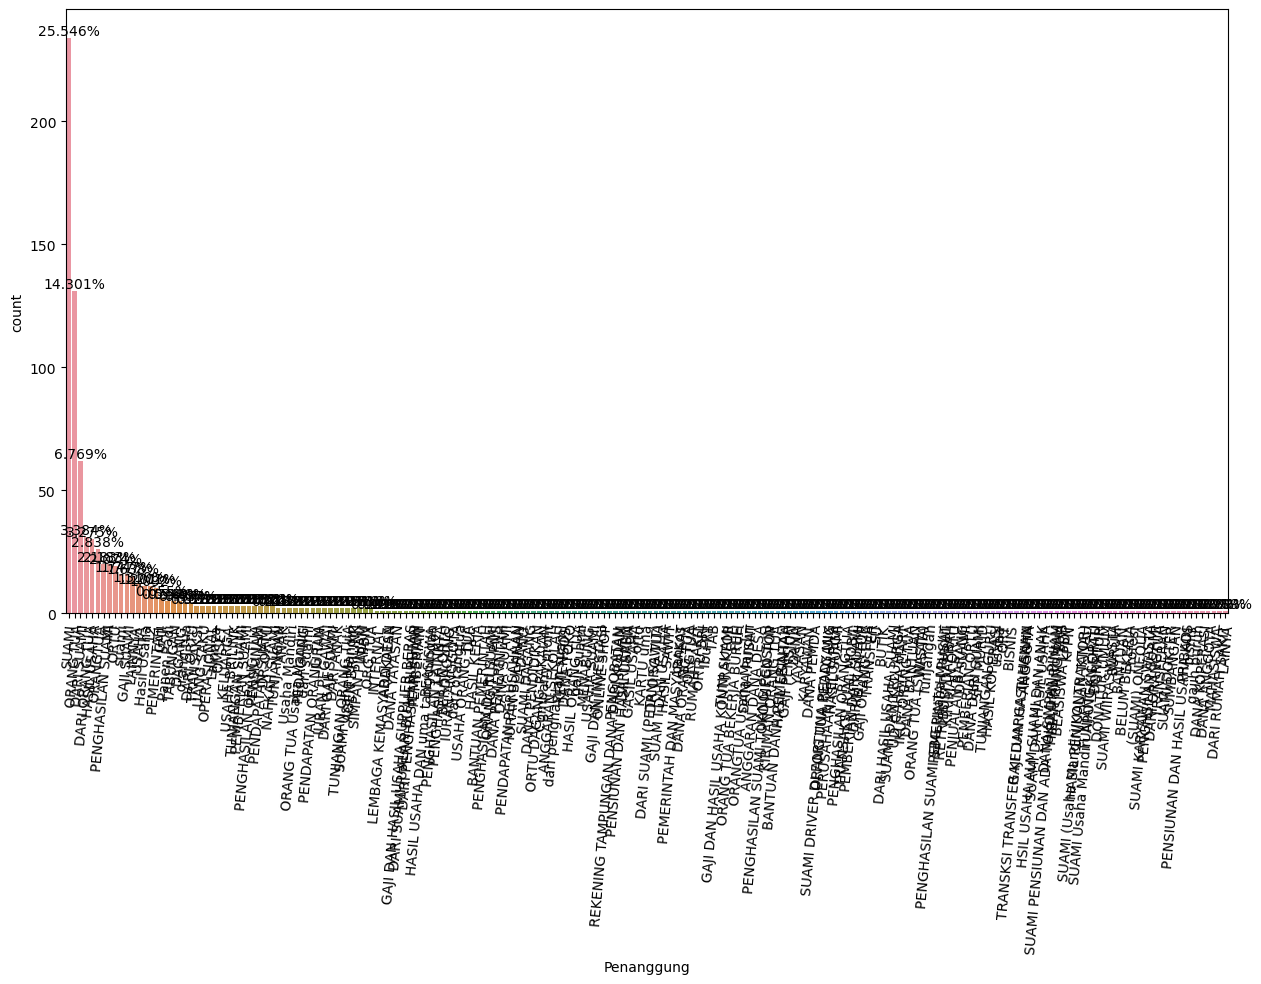

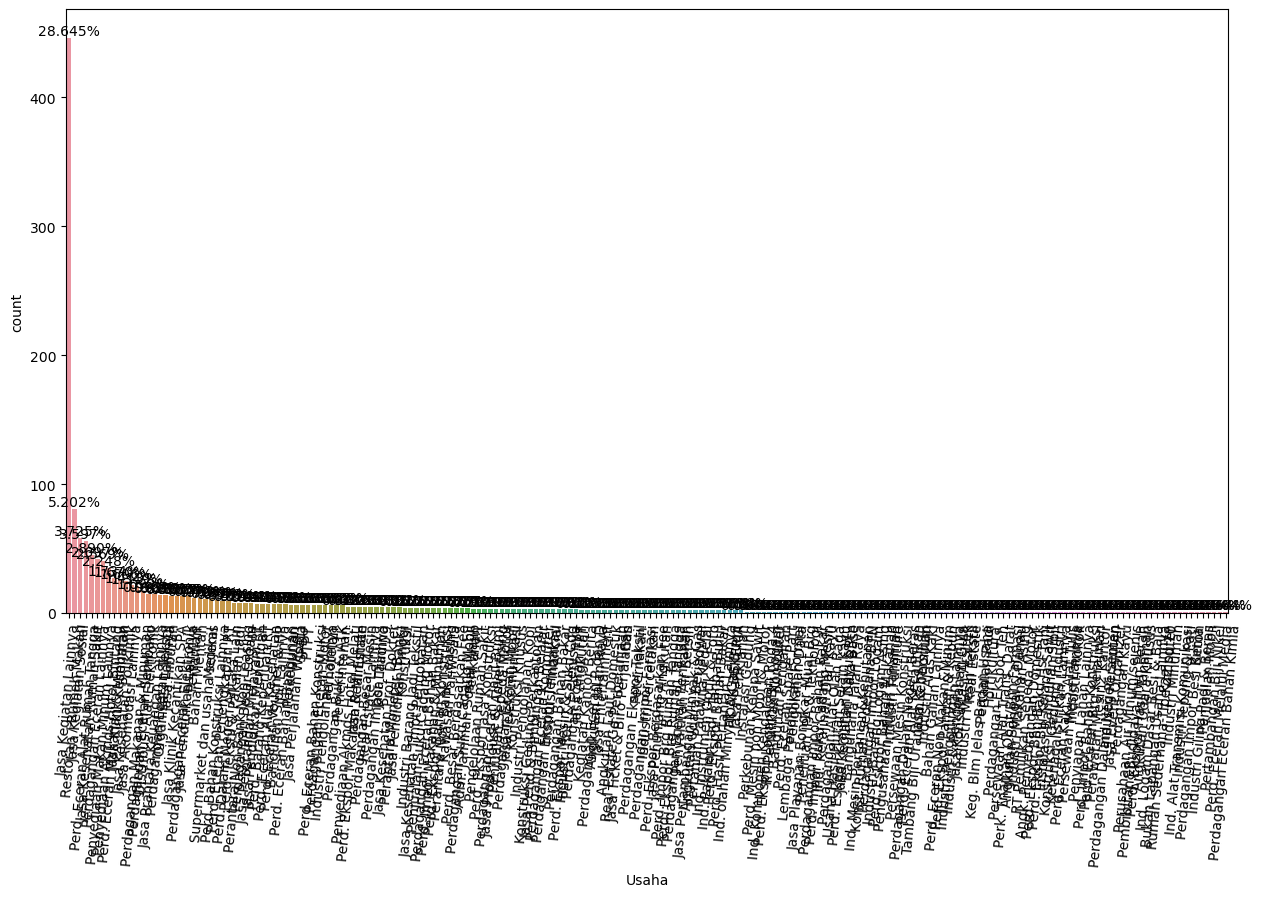

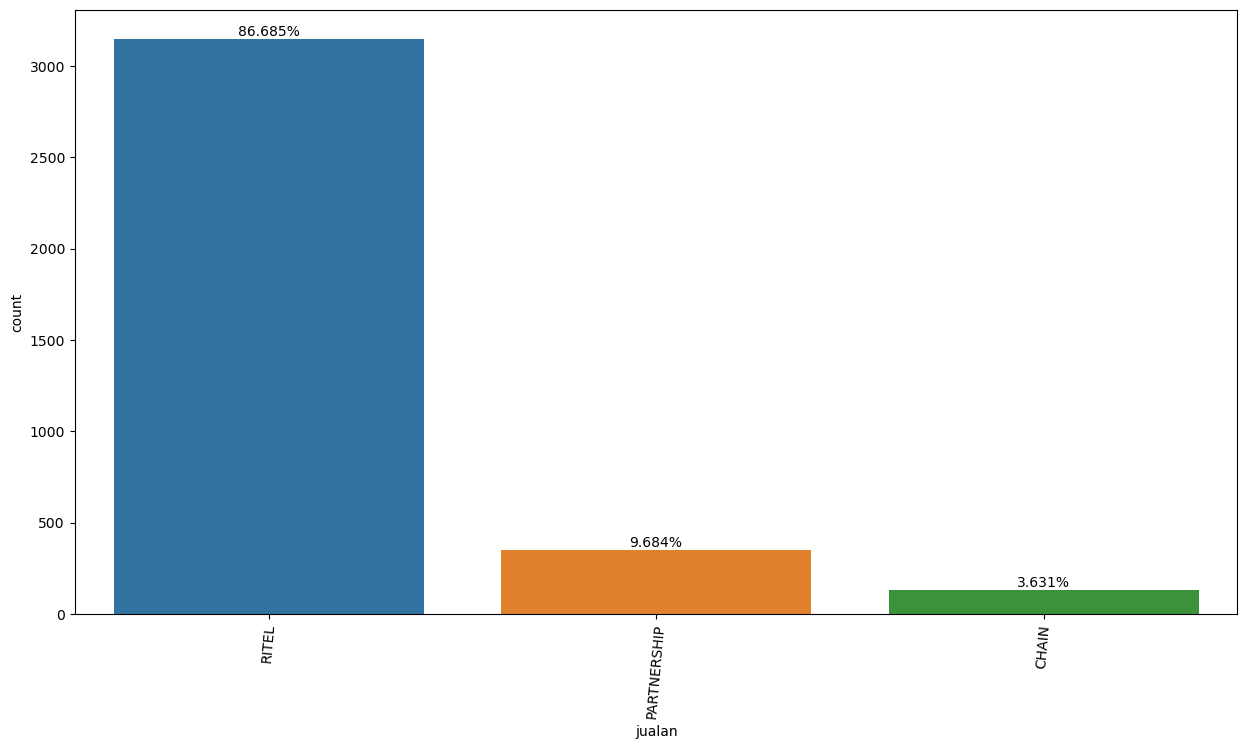

In [13]:
#Visualize the percentage value of the object column
for x in df_train_obj_eda:
    plt.figure(figsize = (15, 8), dpi = 100)
    ax=sns.countplot(df_train_obj_eda[x],data=df_train_obj_eda,  order = df_train_obj_eda[x].value_counts().index)
    plt.xticks(rotation=85)
    rel_values = df_train_obj_eda[x].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]:1.3f}%' for p in zip(rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.show()

kota


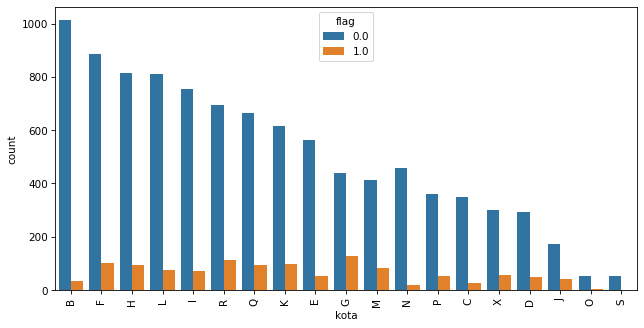

gender


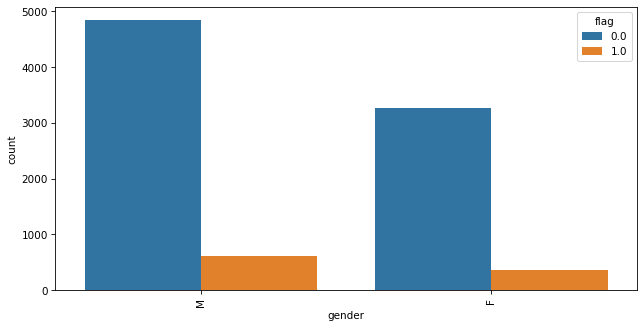

keluarga


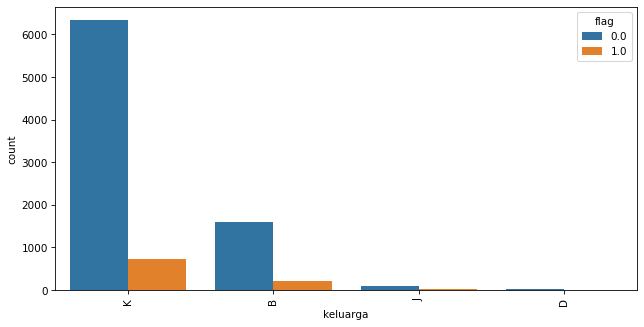

Pekerjaan


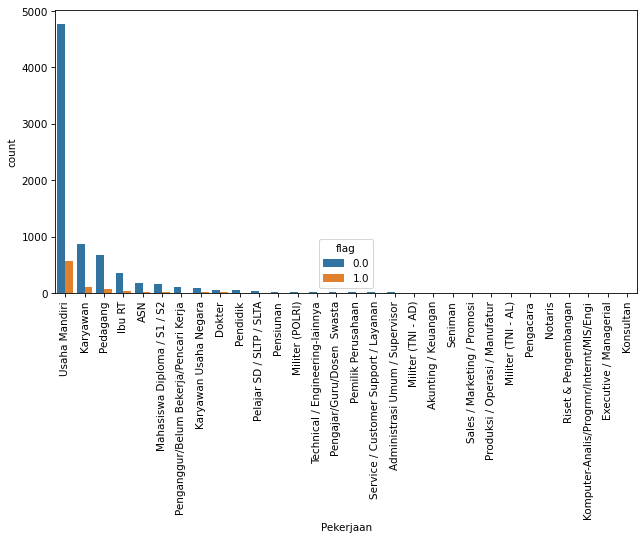

Penanggung


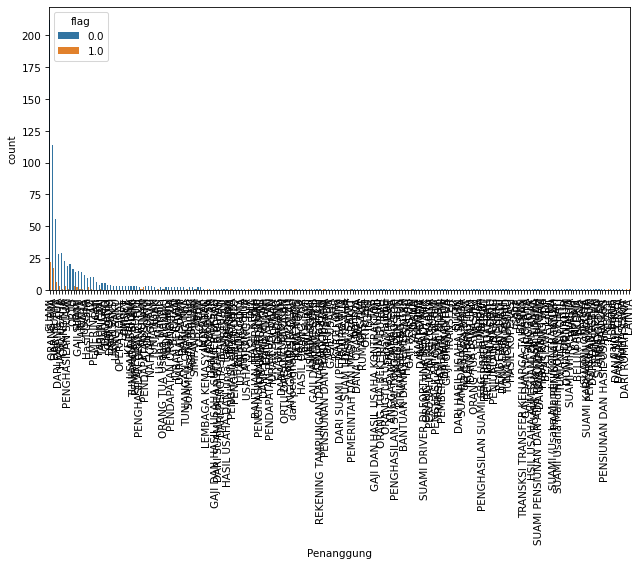

Usaha


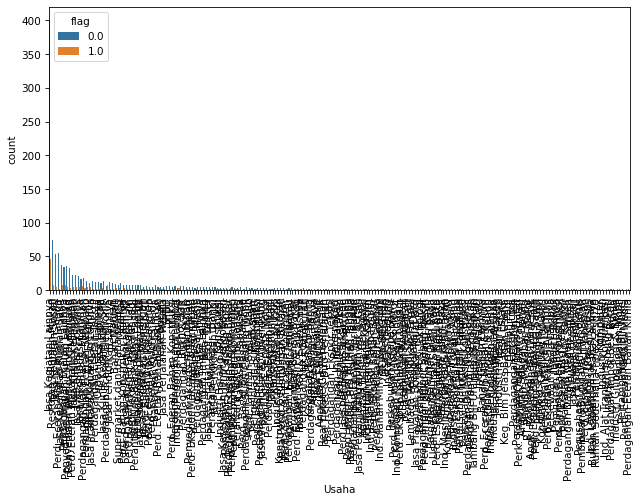

jualan


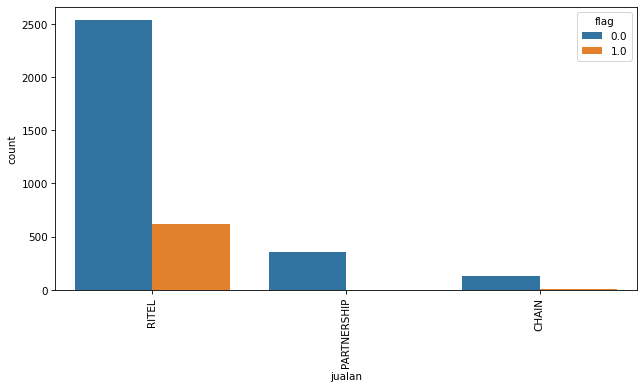

In [14]:
#Visualization to see how many values from each object column match and don't match based on the "flag" column
for x in df_train_obj_eda.columns:
    print(x)
    plt.figure(figsize = (10, 5), dpi = 75)    
    sns.countplot(data = df_train_obj_eda, x=x, hue = df_train_num_eda['flag'],order = df_train_obj_eda[x].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

# 3. Data Preparation

##### A. Data Cleaning

In [15]:
X_train       = df_train.copy(deep=True)
X_test        = df_test.copy(deep=True)
X_backtest    = df_backtesting.copy(deep=True)

In [16]:
#Drop useless columns
X_train    = X_train.drop(['kode pelanggan','tgl data'], axis=1)
X_test     = X_test.drop(['kode pelanggan','tgl data'], axis=1)
X_backtest = X_backtest.drop(['kode pelanggan','tgl data'], axis=1)

In [17]:
X_train.head()

,umur,kota,gender,education,keluarga,Pekerjaan,Penanggung,Usaha,punya_produk1,punya_produk2,punya_produk3,punya_produk4,punya_produk5,punya_produk6,jualan,omset,penghasilan,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,average_sisauang_mingguan_6BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_akhir_5BT,sisauang_akhir_6BT,sisauang_tertahan_1BT,sisauang_tertahan_2BT,sisauang_tertahan_3BT,sisauang_tertahan_4BT,sisauang_tertahan_5BT,sisauang_tertahan_6BT,sisauang_tersedia_1BT,sisauang_tersedia_2BT,sisauang_tersedia_3BT,sisauang_tersedia_4BT,sisauang_tersedia_5BT,sisauang_tersedia_6BT,sisa_hutang_1BT,sisa_hutang_2BT,sisa_hutang_3BT,sisa_hutang_4BT,sisa_hutang_5BT,sisa_hutang_6BT,jumlah_pembayaran_hutang_1BT,jumlah_pembayaran_hutang_2BT,jumlah_pembayaran_hutang_3BT,jumlah_pembayaran_hutang_4BT,jumlah_pembayaran_hutang_5BT,jumlah_pembayaran_hutang_6BT,jumlah_pengeluaran_1BT,jumlah_pengeluaran_2BT,jumlah_pengeluaran_3BT,jumlah_pengeluaran_4BT,jumlah_pengeluaran_5BT,jumlah_pengeluaran_6BT,jumlah_pemasukan_1BT,jumlah_pemasukan_2BT,jumlah_pemasukan_3BT,jumlah_pemasukan_4BT,jumlah_pemasukan_5BT,jumlah_pemasukan_6BT,frekuensi_pengeluaran_1BT,frekuensi_pengeluaran_2BT,frekuensi_pengeluaran_3BT,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,flag
0,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,G,F,NaN,K,Mahasiswa Diploma / S1 / S2,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,L,M,NaN,K,Usaha Mandiri,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,15.114314,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58.0,N,M,NaN,K,Karyawan,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
4,34.0,Q,F,NaN,K,Usaha Mandiri,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,6344.258121,6206.943591,6171.870696,6157.494597,6245.942203,6310.354988,6184.011337,6210.569267,6367.148219,6108.901101,6370.148008,6131.481599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.735658,1937.924424,2146.378375,2351.163245,2552.343715,2749.983057,0.0,0.0,0.0,0.0,0.0,0.0,164.241212,0.0,0.0,5.476237,0.0,0.0,137.683282,0.0,0.0,0.0,0.0,0.0,24.0,22.0,31.0,36.0,37.0,26.0,38.0,19.0,24.0,46.0,42.0,37.0,0.0


In [18]:
#Grouping ownership of six previous product columns into one
for df in [X_train, X_test, X_backtest]:
    df["previous_product"] = df.punya_produk1 + df.punya_produk2 + df.punya_produk3 + df.punya_produk4 + df.punya_produk5 + df.punya_produk6


In [19]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['punya_produk1','punya_produk2','punya_produk3','punya_produk4','punya_produk5','punya_produk6'], axis = 1, inplace = True)

In [20]:
#Grouping total of remaining debt in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["cash_remaining"] = df.average_sisauang_mingguan_1BT + df.average_sisauang_mingguan_2BT + df.average_sisauang_mingguan_3BT + df.average_sisauang_mingguan_4BT + df.average_sisauang_mingguan_5BT + df.average_sisauang_mingguan_6BT


In [21]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['average_sisauang_mingguan_1BT','average_sisauang_mingguan_2BT','average_sisauang_mingguan_3BT','average_sisauang_mingguan_4BT','average_sisauang_mingguan_5BT','average_sisauang_mingguan_6BT'], axis = 1, inplace = True)

In [22]:
#Grouping total of the final balance in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["final_balance"] = df.sisauang_akhir_1BT + df.sisauang_akhir_2BT + df.sisauang_akhir_3BT + df.sisauang_akhir_4BT + df.sisauang_akhir_5BT + df.sisauang_akhir_6BT

In [23]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['sisauang_akhir_1BT','sisauang_akhir_2BT','sisauang_akhir_3BT','sisauang_akhir_4BT','sisauang_akhir_5BT','sisauang_akhir_6BT'], axis = 1, inplace = True)

In [24]:
#Grouping total the rest of the money in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["rest_of_the_money"] = df.sisauang_tertahan_1BT + df.sisauang_tertahan_2BT + df.sisauang_tertahan_3BT + df.sisauang_tertahan_4BT + df.sisauang_tertahan_5BT + df.sisauang_tertahan_6BT

In [25]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['sisauang_tertahan_1BT','sisauang_tertahan_2BT','sisauang_tertahan_3BT','sisauang_tertahan_4BT','sisauang_tertahan_5BT','sisauang_tertahan_6BT'], axis = 1, inplace = True)

In [26]:
#Grouping total of remaining money available in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["remaining_money"] = df.sisauang_tersedia_1BT + df.sisauang_tersedia_2BT + df.sisauang_tersedia_3BT + df.sisauang_tersedia_4BT + df.sisauang_tersedia_5BT + df.sisauang_tersedia_6BT

In [27]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['sisauang_tersedia_1BT','sisauang_tersedia_2BT','sisauang_tersedia_3BT','sisauang_tersedia_4BT','sisauang_tersedia_5BT','sisauang_tersedia_6BT'], axis = 1, inplace = True)

In [28]:
#Grouping total average weekly cash remaining in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["remaining_debt"] = df.sisa_hutang_1BT + df.sisa_hutang_2BT + df.sisa_hutang_3BT + df.sisa_hutang_4BT + df.sisa_hutang_5BT + df.sisa_hutang_6BT

In [29]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['sisa_hutang_1BT','sisa_hutang_2BT','sisa_hutang_3BT','sisa_hutang_4BT','sisa_hutang_5BT','sisa_hutang_6BT'], axis = 1, inplace = True)

In [30]:
#Grouping total amount of debt payment in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["debt_payment"] = df.jumlah_pembayaran_hutang_1BT + df.jumlah_pembayaran_hutang_2BT + df.jumlah_pembayaran_hutang_3BT + df.jumlah_pembayaran_hutang_4BT + df.jumlah_pembayaran_hutang_5BT + df.jumlah_pembayaran_hutang_6BT

In [31]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['jumlah_pembayaran_hutang_1BT','jumlah_pembayaran_hutang_2BT','jumlah_pembayaran_hutang_3BT','jumlah_pembayaran_hutang_4BT','jumlah_pembayaran_hutang_5BT','jumlah_pembayaran_hutang_6BT'], axis = 1, inplace = True)

In [32]:
#Grouping total amount of expenditure in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["amount_of_expenditure"] = df.jumlah_pengeluaran_1BT + df.jumlah_pengeluaran_2BT + df.jumlah_pengeluaran_3BT + df.jumlah_pengeluaran_4BT + df.jumlah_pengeluaran_5BT + df.jumlah_pengeluaran_6BT

In [33]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['jumlah_pengeluaran_1BT','jumlah_pengeluaran_2BT','jumlah_pengeluaran_3BT','jumlah_pengeluaran_4BT','jumlah_pengeluaran_5BT','jumlah_pengeluaran_6BT'], axis = 1, inplace = True)

In [34]:
#Grouping total amount of income in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["amount_of_income"] = df.jumlah_pemasukan_1BT + df.jumlah_pemasukan_2BT + df.jumlah_pemasukan_3BT + df.jumlah_pemasukan_4BT + df.jumlah_pemasukan_5BT + df.jumlah_pemasukan_6BT

In [35]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['jumlah_pemasukan_1BT','jumlah_pemasukan_2BT','jumlah_pemasukan_3BT','jumlah_pemasukan_4BT','jumlah_pemasukan_5BT','jumlah_pemasukan_6BT'], axis = 1, inplace = True)

In [36]:
#Grouping total of dispensing frequency in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["dispensing_frequency"] = df.frekuensi_pengeluaran_1BT + df.frekuensi_pengeluaran_2BT + df.frekuensi_pengeluaran_3BT + df.frekuensi_pengeluaran_4BT + df.frekuensi_pengeluaran_5BT + df.frekuensi_pengeluaran_6BT

In [37]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['frekuensi_pengeluaran_1BT','frekuensi_pengeluaran_2BT','frekuensi_pengeluaran_3BT','frekuensi_pengeluaran_4BT','frekuensi_pengeluaran_5BT','frekuensi_pengeluaran_6BT'], axis = 1, inplace = True)

In [38]:
#Grouping total of intake frequency in the last 6 months columns into one
for df in [X_train, X_test, X_backtest]:
    df["intake_frequency"] = df.frekuensi_pemasukan_1BT + df.frekuensi_pemasukan_2BT + df.frekuensi_pemasukan_3BT + df.frekuensi_pemasukan_4BT + df.frekuensi_pemasukan_5BT + df.frekuensi_pemasukan_6BT

In [39]:
for df in [X_train, X_test, X_backtest]:
    df.drop(['frekuensi_pemasukan_1BT','frekuensi_pemasukan_2BT','frekuensi_pemasukan_3BT','frekuensi_pemasukan_4BT','frekuensi_pemasukan_5BT','frekuensi_pemasukan_6BT'], axis = 1, inplace = True)

In [40]:
X_train.head(10)

,umur,kota,gender,education,keluarga,Pekerjaan,Penanggung,Usaha,jualan,omset,penghasilan,flag,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
0,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
1,32.0,G,F,NaN,K,Mahasiswa Diploma / S1 / S2,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
2,28.0,L,M,NaN,K,Usaha Mandiri,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,15.114314,7.0,22.0
3,58.0,N,M,NaN,K,Karyawan,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,14.0,7.0
4,34.0,Q,F,NaN,K,Usaha Mandiri,NaN,NaN,NaN,NaN,NaN,0.0,4.0,37436.864196,37372.259531,0.0,0.000000,13463.528474,0.00000,169.717449,137.683282,176.0,206.0
5,5.0,S,NaN,NaN,NaN,NaN,NaN,Jasa Kegiatan Lainnya,NaN,NaN,NaN,0.0,1.0,2335.710962,0.000000,0.0,0.000000,0.000000,0.00000,15895.362130,15812.331130,1.0,0.0
6,51.0,Q,F,NaN,K,Usaha Mandiri,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
7,29.0,Q,M,NaN,B,Usaha Mandiri,NaN,NaN,RITEL,NaN,NaN,1.0,3.0,34.064509,2578.225534,0.0,2578.225534,0.000000,0.00000,45703.957274,46938.790075,1047.0,264.0
8,51.0,L,M,NaN,K,Karyawan,NaN,NaN,RITEL,NaN,NaN,0.0,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,60.0,4.0
9,52.0,K,M,NaN,K,Usaha Mandiri,NaN,NaN,NaN,NaN,NaN,0.0,4.0,6376.149025,29534.175700,0.0,29534.175700,461715.754710,518793.84024,76303.171468,75305.894473,69.0,6.0


##### B. Handling Missing Values & Outliers

In [41]:
y_train = X_train.flag
X_train = X_train.drop("flag", axis = 1)
y_test = X_test.flag
X_test = X_test.drop("flag", axis = 1)

In [42]:
#Check the missing values
missing=pd.DataFrame(X_train.isna().sum())
missing['Jumlah Missing Value']=missing
missing = missing.drop([0], axis=1)
percent = pd.DataFrame(X_train.isnull().sum() * 100 / len(X_train))
percent['Persentase Missing Value']=percent
percent = percent.drop([0], axis=1)
percentmissing=pd.concat([missing, percent], axis=1)
percentmissing.transpose()

,umur,kota,gender,education,keluarga,Pekerjaan,Penanggung,Usaha,jualan,omset,penghasilan,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
Jumlah Missing Value,161.000000,157.000000,1996.000000,11059.0,2050.000000,2611.00000,10143.000000,9502.000000,7424.000000,11059.0,11059.0,157.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persentase Missing Value,1.455828,1.419658,18.048648,100.0,18.536938,23.60973,91.717153,85.920969,67.130844,100.0,100.0,1.419658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#I will drop the columns have a missing values above 50%(Except "jualan" column, because i think this column is important)
for df in [X_train, X_test, X_backtest]:
    df.drop(['education','Penanggung','omset','penghasilan','Usaha'], axis = 1, inplace = True)

In [44]:
#If the percentage of missing values > 5% < 50%, i will impute with knn or mice technique
#f the percentage of missing values < 5%, i will impute with simple imputation like median, mean, or most_frequent
below_five_train     = X_train[['umur','kota','previous_product']].copy()
below_five_test      = X_test[['umur','kota','previous_product']].copy()
below_five_backtest  = X_backtest[['umur','kota','previous_product']].copy()
above_five_train     = X_train[['gender','keluarga','Pekerjaan','jualan']].copy()
above_five_test      = X_test[['gender','keluarga','Pekerjaan','jualan']].copy()
above_five_backtest  = X_backtest[['gender','keluarga','Pekerjaan','jualan']].copy()

In [45]:
from sklearn.impute import KNNImputer, SimpleImputer

In [46]:
#Imputation column below_five
simple_mode = SimpleImputer(strategy='most_frequent')

In [47]:
#X_train
below_five_train = pd.DataFrame(below_five_train)
X_train_mode = simple_mode.fit_transform(below_five_train)

In [48]:
X_train_mode = pd.DataFrame(X_train_mode)
X_train_mode.columns = below_five_train.columns
X_train_mode.isna().sum().sum()

0

In [49]:
X_train_mode.head()

,umur,kota,previous_product
0,0.0,C,1.0
1,32.0,G,1.0
2,28.0,L,2.0
3,58.0,N,2.0
4,34.0,Q,4.0


In [50]:
X_train.head()

,umur,kota,gender,keluarga,Pekerjaan,jualan,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
0,0.0,C,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,32.0,G,F,K,Mahasiswa Diploma / S1 / S2,NaN,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,28.0,L,M,K,Usaha Mandiri,NaN,2.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,15.114314,7.0,22.0
3,58.0,N,M,K,Karyawan,NaN,2.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,14.0,7.0
4,34.0,Q,F,K,Usaha Mandiri,NaN,4.0,37436.864196,37372.259531,0.0,0.0,13463.528474,0.0,169.717449,137.683282,176.0,206.0


In [51]:
#X_test
below_five_test = pd.DataFrame(below_five_test)
X_test_mode = simple_mode.transform(below_five_test)

In [52]:
X_test_mode = pd.DataFrame(X_test_mode)
X_test_mode.columns = below_five_test.columns
X_test_mode.isna().sum().sum()

0

In [53]:
X_test_mode.shape

(2765, 3)

In [54]:
#X_backtest
below_five_backtest = pd.DataFrame(below_five_backtest)
X_backtest_mode = simple_mode.transform(below_five_backtest)

In [55]:
X_backtest_mode = pd.DataFrame(X_backtest_mode)
X_backtest_mode.columns = below_five_backtest.columns
X_backtest_mode.isna().sum().sum()

0

In [56]:
#Applying the imputed value of "below five" variable into X_train
X_train['umur'] = X_train_mode['umur'].values
X_train['kota'] = X_train_mode['kota'].values
X_train['previous_product'] = X_train_mode['previous_product'].values

In [57]:
#Applying the imputed value of "below five" variable into X_test
X_test['umur'] = X_test_mode['umur'].values
X_test['kota'] = X_test_mode['kota'].values
X_test['previous_product'] = X_test_mode['previous_product'].values

In [58]:
#Applying the imputed value of "below five" variable into X_backtest
X_backtest['umur'] = X_backtest_mode['umur'].values
X_backtest['kota'] = X_backtest_mode['kota'].values
X_backtest['previous_product'] = X_backtest_mode['previous_product'].values

In [59]:
#Imputation column above_five
#Object column encoding so that it can be imputed
from sklearn.preprocessing import OrdinalEncoder

In [60]:
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_train_obj_oe = above_five_train

In [61]:
X_train_obj_oe = oe.fit_transform(above_five_train)
X_train_obj_oe = pd.DataFrame(X_train_obj_oe)
X_train_obj_oe.columns = above_five_train.columns
X_train_obj_oe

,gender,keluarga,Pekerjaan,jualan
0,NaN,NaN,NaN,NaN
1,0.0,3.0,10.0,NaN
2,1.0,3.0,29.0,NaN
3,1.0,3.0,6.0,NaN
4,0.0,3.0,29.0,NaN
...,...,...,...,...
11054,0.0,3.0,29.0,2.0
11055,0.0,0.0,10.0,NaN
11056,1.0,3.0,NaN,NaN
11057,1.0,3.0,29.0,NaN


In [62]:
oe.categories_

[array(['F', 'M', nan], dtype=object),
 array(['B', 'D', 'J', 'K', nan], dtype=object),
 array(['ASN', 'Administrasi Umum / Supervisor', 'Akunting / Keuangan',
        'Dokter', 'Executive / Managerial', 'Ibu RT', 'Karyawan',
        'Karyawan Usaha Negara',
        'Komputer-Analis/Progrmr/Internt/MIS/Engi', 'Konsultan',
        'Mahasiswa Diploma / S1 / S2', 'Militer (POLRI)',
        'Militer (TNI - AD)', 'Militer (TNI - AL)', 'Notaris', 'Pedagang',
        'Pelajar SD / SLTP / SLTA', 'Pemilik Perusahaan', 'Pendidik',
        'Pengacara', 'Pengajar/Guru/Dosen  Swasta',
        'Penganggur/Belum Bekerja/Pencari Kerja', 'Pensiunan',
        'Produksi / Operasi / Manufatur', 'Riset & Pengembangan',
        'Sales / Marketing / Promosi', 'Seniman',
        'Service / Customer Support / Layanan',
        'Technical / Engineering-lainnya', 'Usaha Mandiri', nan],
       dtype=object),
 array(['CHAIN', 'PARTNERSHIP', 'RITEL', nan], dtype=object)]

In [63]:
#X_test
X_test_obj_oe = above_five_test

In [64]:
X_test_obj_oe = oe.transform(above_five_test)
X_test_obj_oe = pd.DataFrame(X_test_obj_oe)
X_test_obj_oe.columns = above_five_test.columns
X_test_obj_oe

,gender,keluarga,Pekerjaan,jualan
0,NaN,NaN,NaN,NaN
1,1.0,3.0,29.0,NaN
2,1.0,3.0,29.0,NaN
3,0.0,3.0,29.0,2.0
4,1.0,3.0,15.0,NaN
...,...,...,...,...
2760,0.0,3.0,29.0,NaN
2761,NaN,NaN,NaN,NaN
2762,1.0,0.0,29.0,2.0
2763,0.0,0.0,6.0,NaN


In [65]:
#Backtesting
X_backtest_obj_oe = above_five_backtest

In [66]:
X_backtest_obj_oe = oe.transform(above_five_backtest)
X_backtest_obj_oe = pd.DataFrame(X_backtest_obj_oe)
X_backtest_obj_oe.columns = above_five_backtest.columns
X_backtest_obj_oe

,gender,keluarga,Pekerjaan,jualan
0,1.0,0.0,29.0,NaN
1,NaN,NaN,NaN,2.0
2,1.0,3.0,15.0,NaN
3,1.0,3.0,29.0,NaN
4,0.0,2.0,29.0,2.0
...,...,...,...,...
3451,1.0,3.0,29.0,NaN
3452,1.0,0.0,29.0,1.0
3453,1.0,0.0,7.0,2.0
3454,NaN,NaN,NaN,2.0


In [67]:
#Imputation Object columns
imputer_knn = KNNImputer(n_neighbors=3)
imputer_knn.fit(X_train_obj_oe)

KNNImputer(n_neighbors=3)

In [68]:
X_train_obj_oe_knn = imputer_knn.fit_transform(X_train_obj_oe)

In [69]:
X_train_obj_oe_knn = pd.DataFrame(X_train_obj_oe_knn)
X_train_obj_oe_knn.columns = X_train_obj_oe.columns
X_train_obj_oe_knn.isna().sum().sum()

0

In [70]:
# X_train
X_train_obj_inv = pd.DataFrame(oe.inverse_transform(X_train_obj_oe_knn[X_train_obj_oe.columns]))
X_train_obj_inv.columns = X_train_obj_oe.columns

In [71]:
X_train_obj_oe_knn = X_train_obj_oe_knn.copy()
X_train_obj_oe_knn[X_train_obj_oe.columns] = X_train_obj_inv.values
X_train_obj_oe_knn

,gender,keluarga,Pekerjaan,jualan
0,F,J,Penganggur/Belum Bekerja/Pencari Kerja,PARTNERSHIP
1,F,K,Mahasiswa Diploma / S1 / S2,PARTNERSHIP
2,M,K,Usaha Mandiri,RITEL
3,M,K,Karyawan,RITEL
4,F,K,Usaha Mandiri,PARTNERSHIP
...,...,...,...,...
11054,F,K,Usaha Mandiri,RITEL
11055,F,B,Mahasiswa Diploma / S1 / S2,RITEL
11056,M,K,Militer (TNI - AL),RITEL
11057,M,K,Usaha Mandiri,RITEL


In [72]:
# X_test
X_test_obj_knn = pd.DataFrame(imputer_knn.transform(X_test_obj_oe))
X_test_obj_knn.columns = X_test_obj_oe.columns
X_test_obj_knn.isna().sum()

gender       0
keluarga     0
Pekerjaan    0
jualan       0
dtype: int64

In [73]:
X_test_obj_inv = pd.DataFrame(oe.inverse_transform(X_test_obj_knn[X_test_obj_oe.columns]))
X_test_obj_inv.columns = X_test_obj_oe.columns

In [74]:
X_test_obj_knn = X_test_obj_knn.copy()
X_test_obj_knn[X_test_obj_oe.columns] = X_test_obj_inv.values
X_test_obj_knn

,gender,keluarga,Pekerjaan,jualan
0,F,J,Penganggur/Belum Bekerja/Pencari Kerja,PARTNERSHIP
1,M,K,Usaha Mandiri,RITEL
2,M,K,Usaha Mandiri,RITEL
3,F,K,Usaha Mandiri,RITEL
4,M,K,Pedagang,PARTNERSHIP
...,...,...,...,...
2760,F,K,Usaha Mandiri,PARTNERSHIP
2761,F,J,Penganggur/Belum Bekerja/Pencari Kerja,PARTNERSHIP
2762,M,B,Usaha Mandiri,RITEL
2763,F,B,Karyawan,RITEL


In [75]:
# X_backtest
X_backtest_obj_knn = pd.DataFrame(imputer_knn.transform(X_backtest_obj_oe))
X_backtest_obj_knn.columns = X_backtest_obj_oe.columns
X_backtest_obj_knn.isna().sum()

gender       0
keluarga     0
Pekerjaan    0
jualan       0
dtype: int64

In [76]:
X_backtest_obj_inv = pd.DataFrame(oe.inverse_transform(X_backtest_obj_knn[X_backtest_obj_oe.columns]))
X_backtest_obj_inv.columns = X_backtest_obj_oe.columns

In [77]:
X_backtest_obj_knn = X_backtest_obj_knn.copy()
X_backtest_obj_knn[X_backtest_obj_oe.columns] = X_backtest_obj_inv.values
X_backtest_obj_knn

,gender,keluarga,Pekerjaan,jualan
0,M,B,Usaha Mandiri,RITEL
1,M,J,Militer (TNI - AD),RITEL
2,M,K,Pedagang,PARTNERSHIP
3,M,K,Usaha Mandiri,RITEL
4,F,J,Usaha Mandiri,RITEL
...,...,...,...,...
3451,M,K,Usaha Mandiri,RITEL
3452,M,B,Usaha Mandiri,PARTNERSHIP
3453,M,B,Karyawan Usaha Negara,RITEL
3454,M,J,Militer (TNI - AD),RITEL


In [78]:
#Applying the imputed value of "above five" variable into X_train, X_test, X_backtest

X_train['gender']       = X_train_obj_oe_knn['gender'].values
X_train['Pekerjaan']    = X_train_obj_oe_knn['Pekerjaan'].values
X_train['keluarga']     = X_train_obj_oe_knn['keluarga'].values
X_train['jualan']       = X_train_obj_oe_knn['jualan'].values

X_test['gender']        = X_test_obj_knn['gender'].values
X_test['Pekerjaan']     = X_test_obj_knn['Pekerjaan'].values
X_test['keluarga']      = X_test_obj_knn['keluarga'].values
X_test['jualan']        = X_test_obj_knn['jualan'].values

X_backtest['gender']    = X_backtest_obj_knn['gender'].values
X_backtest['Pekerjaan'] = X_backtest_obj_knn['Pekerjaan'].values
X_backtest['keluarga']  = X_backtest_obj_knn['keluarga'].values
X_backtest['jualan']    = X_backtest_obj_knn['jualan'].values


In [79]:
missing=pd.DataFrame(X_train.isna().sum())
missing['Jumlah Missing Value']=missing
missing = missing.drop([0], axis=1)
percent = pd.DataFrame(X_train.isnull().sum() * 100 / len(X_train))
percent['Persentase Missing Value']=percent
percent = percent.drop([0], axis=1)
percentmissing=pd.concat([missing, percent], axis=1)
percentmissing.transpose()

,umur,kota,gender,keluarga,Pekerjaan,jualan,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
Jumlah Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persentase Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
missing=pd.DataFrame(X_test.isna().sum())
missing['Jumlah Missing Value']=missing
missing = missing.drop([0], axis=1)
percent = pd.DataFrame(X_test.isnull().sum() * 100 / len(X_test))
percent['Persentase Missing Value']=percent
percent = percent.drop([0], axis=1)
percentmissing=pd.concat([missing, percent], axis=1)
percentmissing.transpose()

,umur,kota,gender,keluarga,Pekerjaan,jualan,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
Jumlah Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persentase Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
missing=pd.DataFrame(X_backtest.isna().sum())
missing['Jumlah Missing Value']=missing
missing = missing.drop([0], axis=1)
percent = pd.DataFrame(X_backtest.isnull().sum() * 100 / len(X_backtest))
percent['Persentase Missing Value']=percent
percent = percent.drop([0], axis=1)
percentmissing=pd.concat([missing, percent], axis=1)
percentmissing.transpose()

,umur,kota,gender,keluarga,Pekerjaan,jualan,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
Jumlah Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persentase Missing Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Checking the data type of each column whether it is appropriate or not
X_train.dtypes

umur                      object
kota                      object
gender                    object
keluarga                  object
Pekerjaan                 object
jualan                    object
previous_product          object
cash_remaining           float64
final_balance            float64
rest_of_the_money        float64
remaining_money          float64
remaining_debt           float64
debt_payment             float64
amount_of_expenditure    float64
amount_of_income         float64
dispensing_frequency     float64
intake_frequency         float64
dtype: object

In [83]:
#Convert data type to actual data type
for df in [X_train, X_test, X_backtest]:
    df[["umur", "previous_product"]] = df[["umur", "previous_product"]].astype("float")

In [84]:
X_train.dtypes

umur                     float64
kota                      object
gender                    object
keluarga                  object
Pekerjaan                 object
jualan                    object
previous_product         float64
cash_remaining           float64
final_balance            float64
rest_of_the_money        float64
remaining_money          float64
remaining_debt           float64
debt_payment             float64
amount_of_expenditure    float64
amount_of_income         float64
dispensing_frequency     float64
intake_frequency         float64
dtype: object

In [85]:
#Split column into object and numeric
X_train_obj = X_train.select_dtypes(include = 'object')
X_train_num = X_train.select_dtypes(include = 'number')
X_test_obj = X_test.select_dtypes(include = 'object')
X_test_num = X_test.select_dtypes(include = 'number')
X_backtest_obj = X_backtest.select_dtypes(include = 'object')
X_backtest_num = X_backtest.select_dtypes(include = 'number')

In [86]:
X_train_num.columns

Index(['umur', 'previous_product', 'cash_remaining', 'final_balance',
       'rest_of_the_money', 'remaining_money', 'remaining_debt',
       'debt_payment', 'amount_of_expenditure', 'amount_of_income',
       'dispensing_frequency', 'intake_frequency'],
      dtype='object')

In [87]:
X_train_obj.columns

Index(['kota', 'gender', 'keluarga', 'Pekerjaan', 'jualan'], dtype='object')

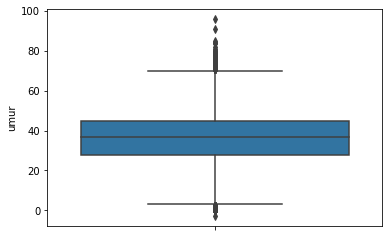

count    11059.000000
mean        34.771408
std         16.548870
min         -3.000000
25%         28.000000
50%         37.000000
75%         45.000000
max         96.000000
Name: umur, dtype: float64
upperlimit: 70.0
lowerlimit: 3.0
outlier: count: 912 proportion: 0.08246676914730085 list: [0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 71.0, 1.0, 2.0, 2.0, 80.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 71.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 76.0, 1.0, 1.0, 1.0, 2.0, 75.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 75.0, 2.0, 0.0, 1.0, 72.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 72.0, 1.0, 77.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 76.0, 1.0, 82.0, 2.0, 1.0, 2.0, 1.0, 2.0, 71.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 74.0, 1.0, 1.0, 2.0, 1.0, 76.0, 2.0, 1.0, 0

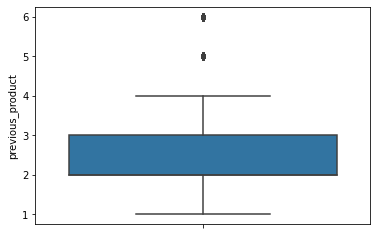

count    11059.000000
mean         2.370648
std          1.064382
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previous_product, dtype: float64
upperlimit: 4.0
lowerlimit: 1.0
outlier: count: 317 proportion: 0.028664436205805225 list: [5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0

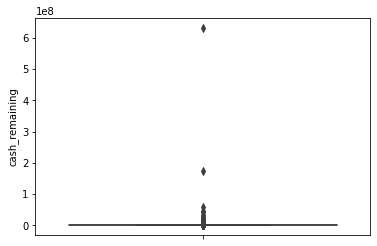

count    1.105900e+04
mean     1.502851e+05
std      6.326849e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.771450e+03
max      6.324107e+08
Name: cash_remaining, dtype: float64
upperlimit: 24425.426933000002
lowerlimit: 0.0
outlier: count: 1955 proportion: 0.17677909395062844 list: [37436.864196, 53920.567224, 26363.6355348, 208956.80257, 40494.983705, 36399.93863, 56037.050772999995, 106871.343312, 31804.830361, 248544.54893999998, 82907.52990000001, 632410688.01, 3741500.4766, 25535.054143, 29238.981738000002, 54397.977002, 183796.574126, 222431.721528, 122737.91621, 25983.156942999998, 70016.845466, 39399.24445, 208868.31412, 383976.70061, 32598.840613, 176486.36703000002, 224697.14766999998, 112730.77982699999, 25733.857712, 93596.73901700001, 219549.03528, 798692.3084, 853312.80155, 78628.61869799999, 38658.6887126, 1551653.9549999998, 28069.999254, 45612.961149, 28606.741902, 59444.864797, 278264.76079, 413605.94922999997, 176689.23333000002, 3

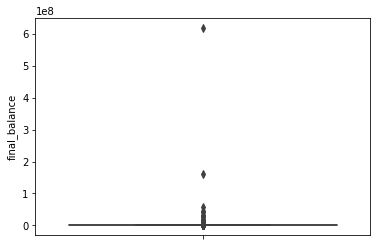

count    1.105900e+04
mean     1.529513e+05
std      6.180791e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.051495e+04
max      6.193309e+08
Name: final_balance, dtype: float64
upperlimit: 26267.148547999997
lowerlimit: 0.0
outlier: count: 1995 proportion: 0.1803960575097206 list: [37372.259530999996, 29534.175699699997, 77940.53082, 26671.2897204, 209372.48783, 155081.92832299997, 27925.16811, 31279.889887, 60558.016803, 250089.04194999998, 86426.01126, 619330949.51, 3743920.2954999995, 29933.362711, 33630.873171, 52196.699166, 159813.825993, 452512.999623, 115181.90888999999, 31058.853441, 140979.814808, 37666.21, 211946.6984, 387004.93561, 33013.8733164, 172967.84083, 68960.92112, 213439.28730999999, 93643.51224499999, 43886.338019999996, 98355.895066, 220230.81944, 800121.5957000001, 778554.8655199999, 88006.776145, 1550608.1013999998, 43498.73172, 35086.90368, 30219.165560999998, 49146.690527, 335048.10587, 465798.1071, 141021.8852, 34392.978831,

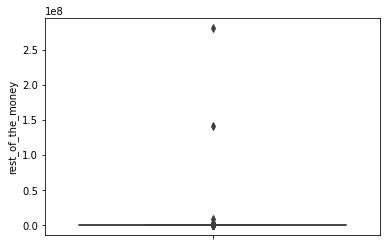

count    1.105900e+04
mean     4.178602e+04
std      2.997415e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.812092e+08
Name: rest_of_the_money, dtype: float64
upperlimit: 0.0
lowerlimit: 0.0
outlier: count: 374 proportion: 0.03381860927751153 list: [46.34870641, 132.5129359, 24566.670416999998, 374.26771655999994, 80098.84128000001, 209286.225, 6836.120922000001, 33737.87943, 175101.045, 33948.76715, 26707.48481, 7277.6147359999995, 4178.010123999999, 8519.261178, 80809.64005, 4202.371204, 50805.80652, 68903.77278, 110345.12485000001, 202.9853768, 33698.227224, 1466.062992, 64536.992684, 153215.20922, 11232.742408, 208.5604612, 2061.5568054, 45657.901085000005, 7424.919574, 137779.42408, 3687.6816648, 87691.62779999999, 139193.4241, 5919.028684, 63960.52644, 8420.593926, 631319.4083, 1390.2227222, 687.1856018, 9131.556805, 8404.742408, 420.031496, 4996.165917, 248851.36332, 487883.98424, 16161.92801, 645340.55714, 232612.9966, 13

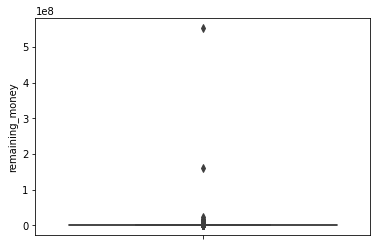

count    1.105900e+04
mean     1.073070e+05
std      5.498726e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.373014e+03
max      5.534757e+08
Name: remaining_money, dtype: float64
upperlimit: 20909.794896
lowerlimit: 0.0
outlier: count: 1986 proportion: 0.17958224070892487 list: [29534.175699699997, 77940.53082, 26593.61536439, 151777.4661453, 31279.889887, 60558.016803, 24025.09913, 250089.04194999998, 86426.01126, 553475704.88, 3742654.8288000003, 29933.362711, 24881.242335, 33630.873171, 52196.699166, 159813.825993, 452512.715595, 115181.90888999999, 22415.30343, 31058.853441, 140979.814808, 24690.954157599997, 211946.6984, 387004.93561, 32910.259565, 172967.84083, 68960.92112, 129074.8328644, 62006.841836, 43886.338019999996, 84316.243776, 211372.55171, 36623.1189508, 778554.8655199999, 88006.776145, 43076.90945, 30219.165560999998, 49146.690527, 111433.57859500001, 465798.1071, 141021.8852, 34223.335974, 82329.512441, 39325.76752, 332275.191710000

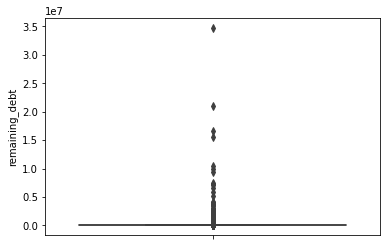

count    1.105900e+04
mean     7.241170e+04
std      5.440684e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.642246e+02
max      3.475333e+07
Name: remaining_debt, dtype: float64
upperlimit: 1881.486502
lowerlimit: 0.0
outlier: count: 2701 proportion: 0.2442354643276969 list: [13463.528474, 461715.75471, 4038.5745219, 27244.019544, 34404.784731, 8798.965411000001, 96521.75232, 9120.922315, 63838.43124, 72072.49606, 19677.11361, 307904.565, 90183.51835999999, 2919.1238751, 136486.831, 552106.7883000001, 15458.89089, 5283.7516872, 78704.66943000001, 3507.259843, 264437.34968, 21199.844210500003, 2011.822553, 219857.72349, 8101.413385, 328973.81778, 2061.5568054, 140923.57601000002, 199301.54556, 32967.76913, 186813.43482999998, 108420.09849, 131040.55742, 44771.061867, 94675.85503, 684961.68564, 21082629.611999996, 107015.97553999998, 74427.435741, 215800.69306000002, 80567.53262299999, 60253.715970000005, 77132.91339, 140687.489, 36780.21597, 35744.6565

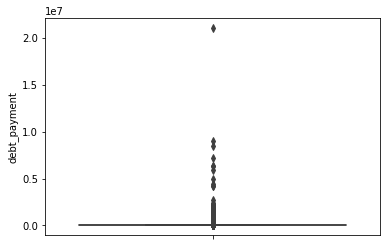

count    1.105900e+04
mean     3.817610e+04
std      3.192613e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.108263e+07
Name: debt_payment, dtype: float64
upperlimit: 0.0
lowerlimit: 0.0
outlier: count: 1108 proportion: 0.10018989058685233 list: [518793.84023999993, 421074.9616, 1374.3712036, 307882.70418, 171149.91000000003, 328973.81778, 2729.4280092, 32.9392576, 1750522.801, 21082629.611999996, 95692.040515, 1549.456974, 8404.744728, 70084.70641, 11943.70529, 206669.13611999998, 328973.81778, 870312.3864000001, 102072.242975, 88566.82564, 15182.001123999999, 423381.6496199999, 1515.323678, 206669.13611999998, 9129.874016, 105507.4004, 202427.13612, 163072.90888, 701318.1284, 202427.13612, 47798.59843, 4947927.6984, 13349.99044, 1467893.9526, 1766123.8178, 261923.70528, 628491.4083, 1404620.6118, 181336.02252, 364125.67377999995, 54789.34083, 586309.1810999999, 4202.371204, 160244.90886, 335583.43361999997, 71626.35573, 147355.7

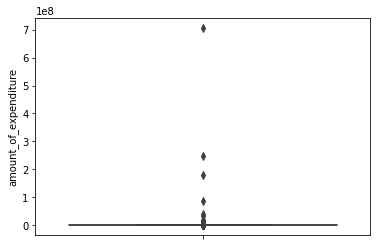

count    1.105900e+04
mean     2.496039e+05
std      7.410008e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.123545e+03
75%      5.101405e+04
max      7.064833e+08
Name: amount_of_expenditure, dtype: float64
upperlimit: 127419.144333
lowerlimit: 0.0
outlier: count: 1738 proportion: 0.15715706664255358 list: [212169.87764799997, 248397.83758, 2019240.5928000002, 364565.75414, 196738.28386, 302037.77362, 685609.6796000001, 425267.83927, 1501163.7005, 706483335.57, 204553.00585000002, 396962.53742, 491817.39505000005, 318976.73513, 271658.71245999995, 1200691.5651299998, 229751.70401, 198047.29794, 481590.39973, 3645579.3508, 135263.99929, 194323.58482, 993160.6734999999, 248710.10398, 745634.3898900001, 222389.78839000003, 249355.25233999998, 1809322.7961999997, 816203.03978, 271792.27661, 2985397.0576, 354545.55263, 293764.91040999995, 181701.18120000002, 215842.77829999998, 345052.78452, 365737.65213999996, 1299433.9876, 472036.71398, 177488.5449, 458094.696018, 270663.1684

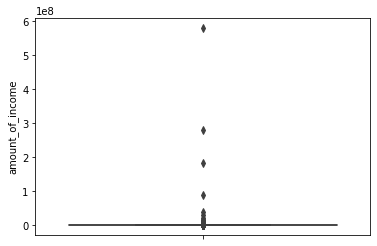

count    1.105900e+04
mean     2.425448e+05
std      6.482345e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.699427e+03
75%      5.360067e+04
max      5.813687e+08
Name: amount_of_income, dtype: float64
upperlimit: 133979.82213000002
lowerlimit: 0.0
outlier: count: 1716 proportion: 0.1551677366850529 list: [213368.226314, 247658.69185, 2000177.2704, 366205.58760999993, 199543.38195999997, 298136.98327, 684942.4974000001, 422893.39405, 1504582.5639, 581368704.14, 240526.89166, 397724.21700999996, 491562.32797000004, 316864.65221, 270573.14855, 1024242.4361200001, 231629.81467, 191099.35849, 477084.12078, 3643074.3531, 135936.27953, 198004.67534, 978381.1047000001, 247122.57852, 736701.18078, 223340.35973999999, 250319.23592999997, 1814716.256, 816203.50482, 271098.51786, 2942945.7463, 351173.62373, 295040.4276, 180349.85335, 220350.83239, 345203.47357000003, 365928.82684, 1335919.4846, 482869.28583999997, 454883.91480699996, 210011.15846600002, 340122.5031, 700686.20084, 306

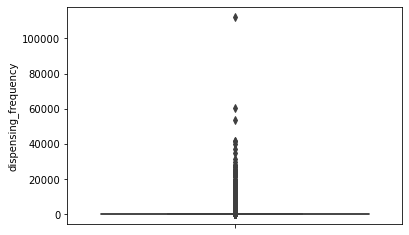

count     11059.000000
mean        612.934352
std        2556.650401
min           0.000000
25%           0.000000
50%          23.000000
75%         169.000000
max      112274.000000
Name: dispensing_frequency, dtype: float64
upperlimit: 422.0
lowerlimit: 0.0
outlier: count: 1839 proportion: 0.16628989962926125 list: [1047.0, 943.0, 750.0, 1475.0, 1594.0, 2335.0, 4331.0, 2662.0, 9510.0, 1741.0, 761.0, 5403.0, 1221.0, 1215.0, 3931.0, 14700.0, 2355.0, 596.0, 3082.0, 590.0, 973.0, 2266.0, 2640.0, 1346.0, 6740.0, 6381.0, 682.0, 1876.0, 1872.0, 4607.0, 8591.0, 2507.0, 2426.0, 17302.0, 441.0, 4609.0, 3135.0, 771.0, 1253.0, 21860.0, 4146.0, 6313.0, 1268.0, 749.0, 803.0, 5646.0, 1250.0, 2838.0, 3307.0, 6752.0, 1368.0, 783.0, 885.0, 1091.0, 774.0, 496.0, 467.0, 1040.0, 1221.0, 1932.0, 34867.0, 559.0, 9082.0, 2428.0, 1451.0, 9396.0, 488.0, 543.0, 1549.0, 508.0, 792.0, 5967.0, 2157.0, 571.0, 3620.0, 849.0, 2371.0, 536.0, 1811.0, 2354.0, 2976.0, 5564.0, 4599.0, 6423.0, 26926.0, 2567.0, 558.0, 596

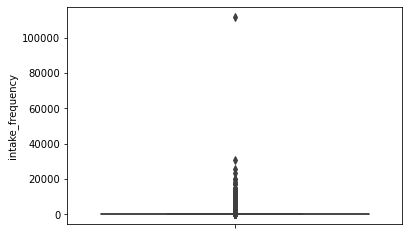

count     11059.000000
mean        312.631160
std        1544.538901
min           0.000000
25%           0.000000
50%           9.000000
75%         120.000000
max      111891.000000
Name: intake_frequency, dtype: float64
upperlimit: 300.0
lowerlimit: 0.0
outlier: count: 1824 proportion: 0.1649335382946017 list: [325.0, 499.0, 6789.0, 1449.0, 419.0, 3494.0, 1188.0, 915.0, 2673.0, 987.0, 5686.0, 655.0, 473.0, 331.0, 11463.0, 474.0, 5291.0, 746.0, 1584.0, 627.0, 504.0, 720.0, 763.0, 1357.0, 537.0, 2261.0, 712.0, 754.0, 1087.0, 1727.0, 341.0, 827.0, 1999.0, 2792.0, 1210.0, 488.0, 326.0, 435.0, 3918.0, 2023.0, 563.0, 397.0, 1490.0, 2210.0, 1708.0, 1043.0, 442.0, 2387.0, 465.0, 361.0, 1632.0, 329.0, 546.0, 376.0, 371.0, 313.0, 345.0, 562.0, 2537.0, 688.0, 1807.0, 350.0, 685.0, 4000.0, 710.0, 549.0, 1371.0, 568.0, 2560.0, 379.0, 1163.0, 357.0, 985.0, 1890.0, 460.0, 1946.0, 1573.0, 1060.0, 1836.0, 1590.0, 1906.0, 461.0, 1234.0, 667.0, 309.0, 514.0, 1049.0, 547.0, 1928.0, 1260.0, 1664.0, 1745

In [88]:
#Check The Outliers
for x in X_train_num.columns:
    # boxplot
    sns.boxplot(y=X_train_num[x])
    plt.show()
   
    
    # statistic metrics
    print(X_train_num[x].describe())
    q1 = np.percentile(X_train_num[x], 25)
    q3 = np.percentile(X_train_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(X_train_num[x][X_train_num[x]<=upperbound])
    lowerlimit = np.min(X_train_num[x][X_train_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = X_train_num[x][(X_train_num[x]>upperbound) | (X_train_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {} list: {}'.format(len(outlier), len(outlier)/len(X_train_num[x]), list(outlier)))

In [89]:
#Handling Outliers
Q1 = X_train_num.quantile(0.25)
Q3 = X_train_num.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (X_train_num > maximum)
lower_than = (X_train_num < minimum)
X_train_num = X_train_num.mask(more_than, maximum, axis=1)
X_train_num = X_train_num.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(X_train_num.describe())

Nilai Maximum dari masing-masing Variable adalah: 
umur                         70.500000
previous_product              4.500000
cash_remaining            24428.624507
final_balance             26287.377318
rest_of_the_money             0.000000
remaining_money           20932.534713
remaining_debt             1910.561463
debt_payment                  0.000000
amount_of_expenditure    127535.117929
amount_of_income         134001.669188
dispensing_frequency        422.500000
intake_frequency            300.000000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
umur                         2.500000
previous_product             0.500000
cash_remaining          -14657.174704
final_balance           -15772.426391
rest_of_the_money            0.000000
remaining_money         -12559.520828
remaining_debt           -1146.336878
debt_payment                 0.000000
amount_of_expenditure   -76521.070757
amount_of_income        -80401.001513
dispensing_frequency      -253.500

In [90]:
#Handling Outliers
Q1 = X_test_num.quantile(0.25)
Q3 = X_test_num.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (X_test_num > maximum)
lower_than = (X_test_num < minimum)
X_test_num = X_test_num.mask(more_than, maximum, axis=1)
X_test_num = X_test_num.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(X_test_num.describe())

Nilai Maximum dari masing-masing Variable adalah: 
umur                         70.500000
previous_product              4.500000
cash_remaining            25048.337972
final_balance             26080.814650
rest_of_the_money             0.000000
remaining_money           21720.001934
remaining_debt             2560.964215
debt_payment                  0.000000
amount_of_expenditure    125472.598965
amount_of_income         128939.754990
dispensing_frequency        412.500000
intake_frequency            292.500000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
umur                         2.500000
previous_product             0.500000
cash_remaining          -15029.002783
final_balance           -15648.488790
rest_of_the_money            0.000000
remaining_money         -13032.001160
remaining_debt           -1536.578529
debt_payment                 0.000000
amount_of_expenditure   -75283.559379
amount_of_income        -77363.852994
dispensing_frequency      -247.500

In [91]:
#Handling Outliers
Q1 = X_backtest_num.quantile(0.25)
Q3 = X_backtest_num.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (X_backtest_num > maximum)
lower_than = (X_backtest_num < minimum)
X_backtest_num = X_backtest_num.mask(more_than, maximum, axis=1)
X_backtest_num = X_backtest_num.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(X_backtest_num.describe())

Nilai Maximum dari masing-masing Variable adalah: 
umur                         70.500000
previous_product              4.500000
cash_remaining            23105.258533
final_balance             22849.294243
rest_of_the_money             0.000000
remaining_money           18857.387551
remaining_debt             1232.530187
debt_payment                  0.000000
amount_of_expenditure    129618.691862
amount_of_income         131383.018575
dispensing_frequency        473.750000
intake_frequency            300.000000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
umur                         2.500000
previous_product             0.500000
cash_remaining          -13863.155120
final_balance           -13709.576546
rest_of_the_money            0.000000
remaining_money         -11314.432530
remaining_debt            -739.518112
debt_payment                 0.000000
amount_of_expenditure   -77771.215117
amount_of_income        -78829.811145
dispensing_frequency      -284.250

# 4. Feature Engineering

##### A. Feature Transformation

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [93]:
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num))
X_train_num_scaled.columns = X_train_num.columns
X_train_num_scaled

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.433824,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.375000,0.285714,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000113,0.016568,0.073333
3,0.816176,0.285714,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.033136,0.023333
4,0.463235,0.857143,1.000000,1.000000,0.0,0.000000,1.0,0.0,0.001331,0.001027,0.416568,0.686667
...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0.463235,0.285714,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.175255,0.148603,0.033136,1.000000
11055,0.360294,0.285714,0.179953,0.295308,0.0,0.370852,1.0,0.0,0.093763,0.097342,0.080473,0.010000
11056,0.625000,0.571429,0.148699,0.000000,0.0,0.000000,1.0,0.0,1.000000,1.000000,0.568047,0.453333
11057,1.000000,0.571429,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.018935,0.000000


In [94]:
X_train_num_scaled.isna().sum().sum()

0

In [95]:
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num))
X_test_num_scaled.columns = X_test_num.columns
X_test_num_scaled

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
0,0.007353,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.013200,0.012182,0.134911,0.366667
1,0.551471,0.571429,0.538831,0.229844,0.0,0.284275,1.340425,0.0,0.189950,0.199692,0.165680,0.076667
2,0.345588,0.857143,0.962136,0.526101,0.0,0.660685,1.340425,0.0,0.160711,0.000000,0.030769,0.003333
3,0.522059,0.285714,1.025368,0.948866,0.0,1.037619,0.000000,0.0,0.983828,0.962225,0.241420,0.975000
4,0.875000,0.571429,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.168523,0.157053,0.620118,0.975000
...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.580882,0.571429,1.008193,0.904723,0.0,1.037619,0.000000,0.0,0.316238,0.314095,0.430769,0.310000
2761,0.036765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.430000
2762,0.419118,1.000000,0.740949,0.822475,0.0,0.234884,1.340425,0.0,0.297656,0.287764,0.471006,0.173333
2763,0.433824,1.000000,0.099901,0.226887,0.0,0.284928,0.000000,0.0,0.009778,0.051745,0.104142,0.033333


In [96]:
X_backtest_num_scaled = pd.DataFrame(scaler.transform(X_backtest_num))
X_backtest_num_scaled.columns = X_backtest_num.columns
X_backtest_num_scaled

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency
0,0.419118,0.285714,0.000000,0.000000,0.0,0.000000,0.645114,0.0,0.000000,0.000000,0.028402,0.000000
1,0.066176,0.571429,0.751780,0.240885,0.0,0.302507,0.000000,0.0,1.016337,0.980458,0.021302,0.046667
2,0.875000,0.571429,0.000000,0.000000,0.0,0.000000,0.206280,0.0,1.016337,0.980458,1.121302,1.000000
3,0.566176,0.571429,0.204754,0.306350,0.0,0.384718,0.000000,0.0,1.016337,0.980458,1.121302,1.000000
4,0.404412,0.857143,0.126690,0.076517,0.0,0.068340,0.645114,0.0,0.051833,0.053309,0.686391,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...
3451,0.904412,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3452,0.448529,0.571429,0.360150,0.458145,0.0,0.575345,0.000000,0.0,0.257038,0.248365,1.121302,1.000000
3453,0.522059,0.857143,0.000000,0.000000,0.0,0.000000,0.645114,0.0,0.000000,0.000000,0.099408,0.063333
3454,0.080882,0.285714,0.945827,0.869212,0.0,0.900865,0.000000,0.0,0.000000,0.980458,0.014201,0.036667


In [97]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_obj)

OneHotEncoder(handle_unknown='ignore')

In [98]:
X_train_obj_ohe = pd.DataFrame(ohe.transform(X_train_obj).toarray())
X_train_obj_ohe.columns = ohe.get_feature_names(X_train_obj.columns)
X_train_obj_ohe

,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11055,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11057,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [99]:
X_test_obj_ohe = pd.DataFrame(ohe.transform(X_test_obj).toarray())
X_test_obj_ohe.columns = ohe.get_feature_names(X_test_obj.columns)
X_test_obj_ohe

,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2762,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
X_backtest_obj_ohe = pd.DataFrame(ohe.transform(X_backtest_obj).toarray())
X_backtest_obj_ohe.columns = ohe.get_feature_names(X_backtest_obj.columns)
X_backtest_obj_ohe

,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
X_train_transformed = pd.concat([X_train_num_scaled, X_train_obj_ohe], axis=1)
X_train_transformed

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.433824,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.375000,0.285714,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000113,0.016568,0.073333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.816176,0.285714,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.033136,0.023333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.463235,0.857143,1.000000,1.000000,0.0,0.000000,1.0,0.0,0.001331,0.001027,0.416568,0.686667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0.463235,0.285714,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.175255,0.148603,0.033136,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11055,0.360294,0.285714,0.179953,0.295308,0.0,0.370852,1.0,0.0,0.093763,0.097342,0.080473,0.010000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11056,0.625000,0.571429,0.148699,0.000000,0.0,0.000000,1.0,0.0,1.000000,1.000000,0.568047,0.453333,0.0,0.

In [102]:
X_test_transformed = pd.concat([X_test_num_scaled, X_test_obj_ohe], axis=1)
X_test_transformed

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.007353,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.013200,0.012182,0.134911,0.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.551471,0.571429,0.538831,0.229844,0.0,0.284275,1.340425,0.0,0.189950,0.199692,0.165680,0.076667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.345588,0.857143,0.962136,0.526101,0.0,0.660685,1.340425,0.0,0.160711,0.000000,0.030769,0.003333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.522059,0.285714,1.025368,0.948866,0.0,1.037619,0.000000,0.0,0.983828,0.962225,0.241420,0.975000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.875000,0.571429,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.168523,0.157053,0.620118,0.975000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.580882,0.571429,1.008193,0.904723,0.0,1.037619,0.000000,0.0,0.316238,0.314095,0.430769,0.310000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2761,0.036765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.430000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2762,0.419118,1.000000,0.740949,0.822475,0.0,0.234884,1.340425,0.0,0.297

In [103]:
X_backtest_transformed = pd.concat([X_backtest_num_scaled, X_backtest_obj_ohe], axis=1)
X_backtest_transformed

,umur,previous_product,cash_remaining,final_balance,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_expenditure,amount_of_income,dispensing_frequency,intake_frequency,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_F,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL
0,0.419118,0.285714,0.000000,0.000000,0.0,0.000000,0.645114,0.0,0.000000,0.000000,0.028402,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.066176,0.571429,0.751780,0.240885,0.0,0.302507,0.000000,0.0,1.016337,0.980458,0.021302,0.046667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.875000,0.571429,0.000000,0.000000,0.0,0.000000,0.206280,0.0,1.016337,0.980458,1.121302,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.566176,0.571429,0.204754,0.306350,0.0,0.384718,0.000000,0.0,1.016337,0.980458,1.121302,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.404412,0.857143,0.126690,0.076517,0.0,0.068340,0.645114,0.0,0.051833,0.053309,0.686391,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,0.904412,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3452,0.448529,0.571429,0.360150,0.458145,0.0,0.575345,0.000000,0.0,0.257038,0.248365,1.121302,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3453,0.522059,0.857143,0.000000,0.000000,0.0,0.000000,0.645114,0.0,0.000

##### B. Feature Selection

In [104]:
#Feature Selection using the "spearmanr" technique
from scipy.stats import spearmanr

In [105]:
a = []
b = []
for x in X_train_transformed.columns:
    for y in X_train_transformed.columns:
        if x != y:
            if [y,x] not in a:
                if np.abs(spearmanr(X_train_transformed[x], X_train_transformed[y])[0]) > 0.8:
                    if spearmanr(X_train_transformed[x], X_train_transformed[y])[1] < 0.05:
                        b.append(x)
                a.append([x,y])
                print([x,y], spearmanr(X_train_transformed[x], X_train_transformed[y])[0], spearmanr(X_train_transformed[x], X_train_transformed[y])[1])
            

['umur', 'previous_product'] 0.18723102479016437 8.470845124730417e-88
['umur', 'cash_remaining'] 0.10964803668577701 6.2454529862654295e-31
['umur', 'final_balance'] 0.11355847586095752 4.554529942900025e-33
['umur', 'rest_of_the_money'] nan nan
['umur', 'remaining_money'] 0.10778630947807084 6.115743719238453e-30
['umur', 'remaining_debt'] 0.15705621105054526 5.191360698153095e-62
['umur', 'debt_payment'] nan nan
['umur', 'amount_of_expenditure'] 0.11670954308985716 7.606169845575591e-35
['umur', 'amount_of_income'] 0.1034624361939154 1.0514973326326825e-27
['umur', 'dispensing_frequency'] 0.2113581287000948 6.710283101238891e-112
['umur', 'intake_frequency'] 0.14136537984278286 1.8197204971405425e-50
['umur', 'kota_B'] 0.04523393301050635 1.9476760160482426e-06
['umur', 'kota_C'] -0.02301853369051532 0.01548992832574366
['umur', 'kota_D'] 0.00597737359606578 0.5296595451035762
['umur', 'kota_E'] -0.008043021073157271 0.39769976548051755
['umur', 'kota_F'] -0.0018568727493392205 0.84

In [106]:
# "b" is a variable in which the column whose value is below the threshold of 0.8
b

['cash_remaining',
 'cash_remaining',
 'final_balance',
 'amount_of_expenditure',
 'amount_of_expenditure',
 'amount_of_expenditure',
 'dispensing_frequency',
 'gender_F',
 'jualan_PARTNERSHIP']

In [107]:
# Remove the column that belongs to the variable "b"
X_train_transformed_mc = X_train_transformed.drop(b, axis=1)

In [108]:
X_train_transformed_mc

,umur,previous_product,rest_of_the_money,remaining_money,remaining_debt,debt_payment,amount_of_income,intake_frequency,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,kota_J,kota_K,kota_L,kota_M,kota_N,kota_O,kota_P,kota_Q,kota_R,kota_S,kota_X,gender_M,keluarga_B,keluarga_D,keluarga_J,keluarga_K,Pekerjaan_ASN,Pekerjaan_Administrasi Umum / Supervisor,Pekerjaan_Akunting / Keuangan,Pekerjaan_Dokter,Pekerjaan_Executive / Managerial,Pekerjaan_Ibu RT,Pekerjaan_Karyawan,Pekerjaan_Karyawan Usaha Negara,Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi,Pekerjaan_Konsultan,Pekerjaan_Mahasiswa Diploma / S1 / S2,Pekerjaan_Militer (POLRI),Pekerjaan_Militer (TNI - AD),Pekerjaan_Militer (TNI - AL),Pekerjaan_Notaris,Pekerjaan_Pedagang,Pekerjaan_Pelajar SD / SLTP / SLTA,Pekerjaan_Pemilik Perusahaan,Pekerjaan_Pendidik,Pekerjaan_Pengacara,Pekerjaan_Pengajar/Guru/Dosen Swasta,Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja,Pekerjaan_Pensiunan,Pekerjaan_Produksi / Operasi / Manufatur,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_RITEL
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.433824,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375000,0.285714,0.0,0.000000,0.0,0.0,0.000113,0.073333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.816176,0.285714,0.0,0.000000,0.0,0.0,0.000000,0.023333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.463235,0.857143,0.0,0.000000,1.0,0.0,0.001027,0.686667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0.463235,0.285714,0.0,1.000000,0.0,0.0,0.148603,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11055,0.360294,0.285714,0.0,0.370852,1.0,0.0,0.097342,0.010000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11056,0.625000,0.571429,0.0,0.000000,1.0,0.0,1.000000,0.453333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11057,1.000000,0.571429,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [109]:
# Using the "Woe" technique to find the information value of each column
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [110]:
data = pd.concat([X_train_transformed_mc, y_train], axis=1)

In [111]:
for feat in data:
    dset, iv = calculate_woe_iv(data,feat,'flag')
    display(dset)
    print('IV ',feat,iv)

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
48,0.919118,41,1,40,0.000837,0.004055,-1.578134,0.005079
63,0.227941,27,1,26,0.000837,0.002636,-1.147351,0.002064
67,0.272059,39,2,37,0.001674,0.003751,-0.807025,0.001676
9,0.316176,95,5,90,0.004184,0.009124,-0.779626,0.003851
20,0.610294,298,16,282,0.013389,0.028589,-0.758573,0.011530
...,...,...,...,...,...,...,...,...
69,0.125000,40,8,32,0.006695,0.003244,0.724451,0.002500
52,0.169118,24,5,19,0.004184,0.001926,0.775745,0.001752
54,0.904412,38,8,30,0.006695,0.003041,0.788990,0.002882
46,0.242647,19,4,15,0.003347,0.001521,0.788990,0.001441


IV  umur 0.09850963861705979


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
2,0.857143,1339,124,1215,0.103766,0.123175,-0.171472,0.003328
0,0.000000,2579,243,2336,0.203347,0.236821,-0.152388,0.005101
1,0.285714,3810,421,3389,0.352301,0.343573,0.025088,0.000219
3,0.571429,3014,366,2648,0.306276,0.268451,0.131819,0.004986
4,1.000000,317,41,276,0.034310,0.027981,0.203917,0.001291


IV  previous_product 0.014924832706546848


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11059,1195,9864,1.0,1.0,0.0,0.0


IV  rest_of_the_money 0.0


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1418,0.187910,1,0,1,0.000000,0.000101,0.000000,-0.000000
1886,0.932301,1,0,1,0.000000,0.000101,0.000000,-0.000000
1887,0.431863,1,0,1,0.000000,0.000101,0.000000,-0.000000
1888,0.117439,1,0,1,0.000000,0.000101,0.000000,-0.000000
1889,0.411518,1,0,1,0.000000,0.000101,0.000000,-0.000000
...,...,...,...,...,...,...,...,...
949,0.176949,1,0,1,0.000000,0.000101,0.000000,-0.000000
950,0.044622,1,0,1,0.000000,0.000101,0.000000,-0.000000
941,0.827149,1,1,0,0.000837,0.000000,0.000000,0.000000
0,0.000000,6236,677,5559,0.566527,0.563564,0.005243,0.000016


IV  remaining_money 0.003025245137988503


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.000000,2701,236,2465,0.197490,0.249899,-0.235370,0.012336
58,0.309528,1,1,0,0.000837,0.000000,0.000000,0.000000
85,0.727718,1,0,1,0.000000,0.000101,0.000000,-0.000000
84,0.731800,1,0,1,0.000000,0.000101,0.000000,-0.000000
83,0.704265,1,0,1,0.000000,0.000101,0.000000,-0.000000
...,...,...,...,...,...,...,...,...
33,0.673921,1,0,1,0.000000,0.000101,0.000000,-0.000000
32,0.335834,1,0,1,0.000000,0.000101,0.000000,-0.000000
31,0.194544,1,0,1,0.000000,0.000101,0.000000,-0.000000
43,0.915787,1,1,0,0.000837,0.000000,0.000000,0.000000


IV  remaining_debt 0.017103189818379574


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11059,1195,9864,1.0,1.0,0.0,0.0


IV  debt_payment 0.0


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
11,1.000000,1716,147,1569,0.123013,0.159063,-0.257016,9.265594e-03
2353,0.001079,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
3141,0.948514,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
3140,0.139286,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
3139,0.341304,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...
1567,0.169984,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
1566,0.293892,1,0,1,0.000000,0.000101,0.000000,-0.000000e+00
356,0.015680,9,1,8,0.000837,0.000811,0.031304,8.073335e-07
0,0.000000,4608,567,4041,0.474477,0.409672,0.146857,9.517162e-03


IV  amount_of_income 0.019408481956891252


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
8,1.000000,1828,63,1765,0.052720,0.178933,-1.222026,0.154237
110,0.153333,21,1,20,0.000837,0.002028,-0.884987,0.001054
68,0.140000,20,1,19,0.000837,0.001926,-0.833693,0.000908
220,0.176667,19,1,18,0.000837,0.001825,-0.779626,0.000770
64,0.233333,16,1,15,0.000837,0.001521,-0.597305,0.000408
...,...,...,...,...,...,...,...,...
274,0.516667,2,1,1,0.000837,0.000101,2.110746,0.001552
260,0.576667,2,1,1,0.000837,0.000101,2.110746,0.001552
3,0.686667,4,2,2,0.001674,0.000203,2.110746,0.003105
163,0.953333,2,1,1,0.000837,0.000101,2.110746,0.001552


IV  intake_frequency 0.31319814419334935


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,1204,37,1167,0.030962,0.118309,-1.340528,0.117091
0,0.0,9855,1158,8697,0.969038,0.881691,0.094462,0.008251


IV  kota_B 0.1253415792041316


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,378,28,350,0.023431,0.035483,-0.414983,0.005001
1,0.0,10681,1167,9514,0.976569,0.964517,0.012418,0.000150


IV  kota_C 0.005150861284883958


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10717,1145,9572,0.958159,0.970397,-0.012692,0.000155
1,1.0,342,50,292,0.041841,0.029603,0.346015,0.004235


IV  kota_D 0.00438999970851967


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,613,51,562,0.042678,0.056975,-0.288931,0.004131
0,0.0,10446,1144,9302,0.957322,0.943025,0.015047,0.000215


IV  kota_E 0.0043459791563537


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,990,103,887,0.086192,0.089923,-0.042370,0.000158
0,0.0,10069,1092,8977,0.913808,0.910077,0.004091,0.000015


IV  kota_F 0.00017332244528768604


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10491,1067,9424,0.892887,0.955393,-0.067663,0.004229
1,1.0,568,128,440,0.107113,0.044607,0.876001,0.054756


IV  kota_G 0.05898497618278729


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,908,93,815,0.077824,0.082624,-0.059843,0.000287
0,0.0,10151,1102,9049,0.922176,0.917376,0.005218,0.000025


IV  kota_H 0.00031225506028159867


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,829,73,756,0.061088,0.076642,-0.226836,0.003528
0,0.0,10230,1122,9108,0.938912,0.923358,0.016705,0.000260


IV  kota_I 0.00378816033315906


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10844,1153,9691,0.964854,0.982461,-0.018085,0.000318
1,1.0,215,42,173,0.035146,0.017539,0.695124,0.012240


IV  kota_J 0.01255811619722099


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10347,1099,9248,0.919665,0.937551,-0.019261,0.000344
1,1.0,712,96,616,0.080335,0.062449,0.251847,0.004504


IV  kota_K 0.0048488773184175256


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,886,74,812,0.061925,0.08232,-0.284690,0.005806
0,0.0,10173,1121,9052,0.938075,0.91768,0.021981,0.000448


IV  kota_L 0.00625450513038082


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10563,1112,9451,0.930544,0.958131,-0.029215,0.000806
1,1.0,496,83,413,0.069456,0.041869,0.506139,0.013963


IV  kota_M 0.014768602316093778


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,476,19,457,0.0159,0.04633,-1.069499,0.032545
0,0.0,10583,1176,9407,0.9841,0.95367,0.031410,0.000956


IV  kota_N 0.03350122483595573


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,58,5,53,0.004184,0.005373,-0.250108,0.000297
0,0.0,11001,1190,9811,0.995816,0.994627,0.001195,0.000001


IV  kota_O 0.000298792701187089


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10648,1143,9505,0.956485,0.963605,-0.007416,0.000053
1,1.0,411,52,359,0.043515,0.036395,0.178667,0.001272


IV  kota_P 0.0013248495011333092


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10299,1101,9198,0.921339,0.932482,-0.012022,0.000134
1,1.0,760,94,666,0.078661,0.067518,0.152751,0.001702


IV  kota_Q 0.00183603158188063


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10252,1083,9169,0.906276,0.929542,-0.025348,0.000590
1,1.0,807,112,695,0.093724,0.070458,0.285333,0.006638


IV  kota_R 0.007228168691458362


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,52,0,52,0.0,0.005272,0.000000,-0.000000
0,0.0,11007,1195,9812,1.0,0.994728,0.005286,0.000028


IV  kota_S 2.786427942230465e-05


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10705,1140,9565,0.953975,0.969688,-0.016337,0.000257
1,1.0,354,55,299,0.046025,0.030312,0.417635,0.006562


IV  kota_X 0.006818939684339298


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,5159,484,4675,0.405021,0.473946,-0.157154,0.010832
1,1.0,5900,711,5189,0.594979,0.526054,0.123122,0.008486


IV  gender_M 0.019317928883984425


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,9256,990,8266,0.828452,0.837997,-0.011455,0.000109
1,1.0,1803,205,1598,0.171548,0.162003,0.057247,0.000546


IV  keluarga_B 0.0006557605030092044


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11023,1188,9835,0.994142,0.99706,-0.002931,0.000009
1,1.0,36,7,29,0.005858,0.00294,0.689360,0.002011


IV  keluarga_D 0.002019935464161794


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,0.0,8930,942,7988,0.788285,0.809813,-0.026945,0.000580
0,1.0,2129,253,1876,0.211715,0.190187,0.107238,0.002309


IV  keluarga_J 0.002888813573640548


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,7091,730,6361,0.610879,0.64487,-0.054151,0.001841
0,0.0,3968,465,3503,0.389121,0.35513,0.091408,0.003107


IV  keluarga_K 0.00494777018580901


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,191,16,175,0.013389,0.017741,-0.281452,0.001225
0,0.0,10868,1179,9689,0.986611,0.982259,0.004421,0.000019


IV  Pekerjaan_ASN 0.0012441635457149242


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,13,1,12,0.000837,0.001217,-0.374161,1.420783e-04
0,0.0,11046,1194,9852,0.999163,0.998783,0.000380,1.443392e-07


IV  Pekerjaan_Administrasi Umum / Supervisor 0.00014222262449841146


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11049,1193,9856,0.998326,0.999189,-0.000864,7.450219e-07
1,1.0,10,2,8,0.001674,0.000811,0.724451,6.249190e-04


IV  Pekerjaan_Akunting / Keuangan 0.0006256640036024887


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10982,1180,9802,0.987448,0.993715,-0.006326,0.000040
1,1.0,77,15,62,0.012552,0.006285,0.691661,0.004335


IV  Pekerjaan_Dokter 0.004374163142912817


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,2,0,2,0.0,0.000203,0.000000,-0.000000e+00
0,0.0,11057,1195,9862,1.0,0.999797,0.000203,4.111477e-08


IV  Pekerjaan_Executive / Managerial 4.111477293366362e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,388,38,350,0.031799,0.035483,-0.109601,0.000404
0,0.0,10671,1157,9514,0.968201,0.964517,0.003812,0.000014


IV  Pekerjaan_Ibu RT 0.00041774557293070133


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10076,1081,8995,0.904603,0.911902,-0.008037,0.000059
1,1.0,983,114,869,0.095397,0.088098,0.079601,0.000581


IV  Pekerjaan_Karyawan 0.0006396983244032071


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10908,1177,9731,0.984937,0.986517,-0.001602,0.000003
1,1.0,151,18,133,0.015063,0.013483,0.110768,0.000175


IV  Pekerjaan_Karyawan Usaha Negara 0.00017747652496843293


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,2,0,2,0.0,0.000203,0.000000,-0.000000e+00
0,0.0,11057,1195,9862,1.0,0.999797,0.000203,4.111477e-08


IV  Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi 4.111477293366362e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,1,0,1,0.0,0.000101,0.000000,-0.000000e+00
0,0.0,11058,1195,9863,1.0,0.999899,0.000101,1.027817e-08


IV  Pekerjaan_Konsultan 1.0278172160051195e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10882,1173,9709,0.98159,0.984286,-0.002743,0.000007
1,1.0,177,22,155,0.01841,0.015714,0.158363,0.000427


IV  Pekerjaan_Mahasiswa Diploma / S1 / S2 0.00043439597051963955


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,26,1,25,0.000837,0.002534,-1.108130,0.001881
0,0.0,11033,1194,9839,0.999163,0.997466,0.001701,0.000003


IV  Pekerjaan_Militer (POLRI) 0.0018841027376045733


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10612,1094,9518,0.915481,0.964923,-0.052598,0.002601
1,1.0,447,101,346,0.084519,0.035077,0.879427,0.043480


IV  Pekerjaan_Militer (TNI - AD) 0.0460810141532044


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,155,11,144,0.009205,0.014599,-0.461172,0.002487
0,0.0,10904,1184,9720,0.990795,0.985401,0.005458,0.000029


IV  Pekerjaan_Militer (TNI - AL) 0.002516782971806773


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,3,0,3,0.0,0.000304,0.000000,-0.000000e+00
0,0.0,11056,1195,9861,1.0,0.999696,0.000304,9.251293e-08


IV  Pekerjaan_Notaris 9.251292939510266e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,10302,1113,9189,0.931381,0.931569,-0.000202,3.818262e-08
1,1.0,757,82,675,0.068619,0.068431,0.002752,5.190253e-07


IV  Pekerjaan_Pedagang 5.572079165123599e-07


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,50,3,47,0.00251,0.004765,-0.640790,0.001445
0,0.0,11009,1192,9817,0.99749,0.995235,0.002263,0.000005


IV  Pekerjaan_Pelajar SD / SLTP / SLTA 0.0014496592062165367


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11042,1192,9850,0.99749,0.998581,-0.001093,0.000001
1,1.0,17,3,14,0.00251,0.001419,0.570301,0.000622


IV  Pekerjaan_Pemilik Perusahaan 0.0006234808154097442


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,62,4,58,0.003347,0.00588,-0.563403,0.001427
0,0.0,10997,1191,9806,0.996653,0.99412,0.002544,0.000006


IV  Pekerjaan_Pendidik 0.0014333679940598152


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11050,1194,9856,0.999163,0.999189,-0.000026,6.656765e-10
1,1.0,9,1,8,0.000837,0.000811,0.031304,8.073335e-07


IV  Pekerjaan_Pengacara 8.079992027845561e-07


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,21,1,20,0.000837,0.002028,-0.884987,0.001054
0,0.0,11038,1194,9844,0.999163,0.997972,0.001192,0.000001


IV  Pekerjaan_Pengajar/Guru/Dosen  Swasta 0.001055222204708227


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,1698,146,1552,0.122176,0.15734,-0.252947,0.008895
1,0.0,9361,1049,8312,0.877824,0.84266,0.040883,0.001438


IV  Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja 0.01033226981362096


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,332,29,303,0.024268,0.030718,-0.235691,0.001520
0,0.0,10727,1166,9561,0.975732,0.969282,0.006632,0.000043


IV  Pekerjaan_Pensiunan 0.0015629830615942067


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,3,0,3,0.0,0.000304,0.000000,-0.000000e+00
0,0.0,11056,1195,9861,1.0,0.999696,0.000304,9.251293e-08


IV  Pekerjaan_Produksi / Operasi / Manufatur 9.251292939510266e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,3,0,3,0.0,0.000304,0.000000,-0.000000e+00
0,0.0,11056,1195,9861,1.0,0.999696,0.000304,9.251293e-08


IV  Pekerjaan_Riset & Pengembangan 9.251292939510266e-08


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,11053,1194,9859,0.999163,0.999493,-0.000330,1.089246e-07
1,1.0,6,1,5,0.000837,0.000507,0.501308,1.653946e-04


IV  Pekerjaan_Sales / Marketing / Promosi 0.00016550352298851513


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,60,5,55,0.004184,0.005576,-0.287150,0.000400
0,0.0,10999,1190,9809,0.995816,0.994424,0.001399,0.000002


IV  Pekerjaan_Seniman 0.0004015815097045032


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,13,1,12,0.000837,0.001217,-0.374161,1.420783e-04
0,0.0,11046,1194,9852,0.999163,0.998783,0.000380,1.443392e-07


IV  Pekerjaan_Service / Customer Support / Layanan 0.00014222262449841146


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,24,1,23,0.000837,0.002332,-1.024749,0.001532
0,0.0,11035,1194,9841,0.999163,0.997668,0.001497,0.000002


IV  Pekerjaan_Technical / Engineering-lainnya 0.001534125952788413


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,5378,579,4799,0.484519,0.486517,-0.004115,0.000008
0,0.0,5681,616,5065,0.515481,0.513483,0.003883,0.000008


IV  Pekerjaan_Usaha Mandiri 1.597820817862146e-05


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,132,7,125,0.005858,0.012672,-0.771658,0.005259
0,0.0,10927,1188,9739,0.994142,0.987328,0.006878,0.000047


IV  jualan_CHAIN 0.0053054164832873904


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,3693,248,3445,0.207531,0.34925,-0.520505,0.073765
1,1.0,7366,947,6419,0.792469,0.65075,0.197027,0.027922


IV  jualan_RITEL 0.1016874859463282


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,9864,0,9864,0.0,1.0,0.0,-0.0
1,1.0,1195,1195,0,1.0,0.0,0.0,0.0


IV  flag 0.0


In [112]:
# At here, I select a column that has a minimum value of 0.02
X_train_transformed_mc=X_train_transformed_mc[['umur', 'intake_frequency', 'kota_B', 'kota_G', 'kota_N', 'kota_S',
'Pekerjaan_Executive / Managerial','Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi',
'Pekerjaan_Konsultan','Pekerjaan_Militer (TNI - AD)','Pekerjaan_Notaris',
'Pekerjaan_Pedagang','Pekerjaan_Pengacara','Pekerjaan_Produksi / Operasi / Manufatur',
'Pekerjaan_Riset & Pengembangan','Pekerjaan_Usaha Mandiri','jualan_RITEL']]




In [113]:
X_test_transformed_mc=X_test_transformed[['umur', 'intake_frequency', 'kota_B', 'kota_G', 'kota_N', 'kota_S',
'Pekerjaan_Executive / Managerial','Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi',
'Pekerjaan_Konsultan','Pekerjaan_Militer (TNI - AD)','Pekerjaan_Notaris',
'Pekerjaan_Pedagang','Pekerjaan_Pengacara','Pekerjaan_Produksi / Operasi / Manufatur',
'Pekerjaan_Riset & Pengembangan','Pekerjaan_Usaha Mandiri','jualan_RITEL']]



In [114]:
X_backtest_transformed_mc=X_backtest_transformed[['umur', 'intake_frequency', 'kota_B', 'kota_G', 'kota_N', 'kota_S',
'Pekerjaan_Executive / Managerial','Pekerjaan_Komputer-Analis/Progrmr/Internt/MIS/Engi',
'Pekerjaan_Konsultan','Pekerjaan_Militer (TNI - AD)','Pekerjaan_Notaris',
'Pekerjaan_Pedagang','Pekerjaan_Pengacara','Pekerjaan_Produksi / Operasi / Manufatur',
'Pekerjaan_Riset & Pengembangan','Pekerjaan_Usaha Mandiri','jualan_RITEL']]


- Resampling

In [115]:
y_train.value_counts()

0.0    9864
1.0    1195
Name: flag, dtype: int64

In [116]:
#Because the dataset is imbalance, i handle it with do the resampling
from imblearn.over_sampling import ADASYN

In [117]:
adasyn = ADASYN()

In [118]:
X_train_mc, y_train_mc = adasyn.fit_resample(X_train_transformed_mc, y_train)
print(y_train_mc.value_counts())

0.0    9864
1.0    9839
Name: flag, dtype: int64


# 5. Modelling

In [119]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
kfold = StratifiedKFold(n_splits=10)

In [120]:
#After try some algorithm, the "Logsitic Regression" is the best, so i use it
y_train=y_train_mc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
logreg.fit(X_train_mc, y_train_mc)
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l1', 'l2', 'none'],
              'multi_class': ['auto', 'ovr', 'multinomial']}

gscv = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kfold)
gscv.fit(X_train_mc, y_train_mc)
gscv.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'lbfgs'}

In [122]:
logreg = LogisticRegression()
logreg.fit(X_train_mc, y_train_mc)
logreg_opt=LogisticRegression(multi_class = 'auto', penalty='none', solver='lbfgs')
logreg_opt.fit(X_train_mc, y_train_mc)

LogisticRegression(penalty='none')

In [123]:
y_train_pred_d_lr = logreg.predict(X_train_mc)
y_test_pred_d_lr = logreg.predict(X_test_transformed_mc)
y_train_pred_o_lr = logreg_opt.predict(X_train_mc)
y_test_pred_o_lr = logreg_opt.predict(X_test_transformed_mc)

In [124]:
from sklearn.metrics import classification_report
print('default-train')
print(classification_report(y_train_mc, y_train_pred_d_lr))
print('default-test')
print(classification_report(y_test, y_test_pred_d_lr))

print('optimized-train')
print(classification_report(y_train_mc, y_train_pred_o_lr))
print('optimized-test')
print(classification_report(y_test, y_test_pred_o_lr))

default-train
              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58      9864
         1.0       0.59      0.66      0.63      9839

    accuracy                           0.60     19703
   macro avg       0.61      0.60      0.60     19703
weighted avg       0.61      0.60      0.60     19703

default-test
              precision    recall  f1-score   support

         0.0       0.94      0.55      0.70      2466
         1.0       0.16      0.70      0.26       299

    accuracy                           0.57      2765
   macro avg       0.55      0.62      0.48      2765
weighted avg       0.85      0.57      0.65      2765

optimized-train
              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58      9864
         1.0       0.59      0.66      0.63      9839

    accuracy                           0.60     19703
   macro avg       0.61      0.60      0.60     19703
weighted avg       0.61      0.

The Final Result Is Recall = 0,70 and FPR = 0,45 (1 - 0,55)

Why is the value of "recall" the guide in this case?
Because this dataset has very unbalanced proportions and the FPR Value is like a tolerance threshold,
so the model will make unsuitable consumers will be detected as suitable 

Because the cost of product offerings in this case is relatively cheap, such as by telephone or sales team visits, 
the FPR value can be applied according to the provisions. In other cases where the cost of ad bidding is quite high, 
the maximum FPR value will be reduced